In [108]:
import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib.colors import TABLEAU_COLORS

In [109]:
from matplotlib import font_manager

# Download the Times New Roman font
font_url = "https://github.com/justrajdeep/fonts/raw/refs/heads/master/Times%20New%20Roman.ttf"
font_path = "Times%20New%20Roman.ttf"

if not os.path.exists(font_path):
    import requests
    response = requests.get(font_url)
    with open(font_path, "wb") as file:
        file.write(response.content)

# Add the font to Matplotlib
font_manager.fontManager.addfont(font_path)
times_new_roman = font_manager.FontProperties(fname=font_path)

# Set Times New Roman as the default font and appropriate size for our visualisations
plt.rcParams["font.family"] = times_new_roman.get_name()
plt.rcParams["font.size"] = 11  # Set font size to 11

## Data

**Importing the data**

In [125]:
# Define year-specific columns and mappings
years = {
    2009: {
        'url': "https://github.com/bruno-alv/capstone/raw/refs/heads/data/2009.csv",
        'columns': ['A3', 'A3B', 'A8', 'J1', 'J3', 'J4',
                    'J5', 'J10', 'B1', 'B2', 'B4', 'F1', 'F2_1', 'F2_2', 'F2_3',
                    'F2_4', 'F2_5', 'F2_6', 'M1_1', 'M6', 'M7', 'M8'],
        'rename_map': {'A3': 'A50A', 'A3B': 'A50B', 'A8': 'A8_2021'}
    },
    2012: {
        'url': "https://github.com/bruno-alv/capstone/raw/refs/heads/data/2012.csv",
        'columns': ['A3', 'A3B', 'A8', 'J1', 'J3', 'J4',
                    'J5', 'J10', 'J20', 'B1', 'B2', 'B4', 'F1', 'F2_1', 'F2_2', 'F2_3',
                    'F2_4', 'F2_5', 'F2_6', 'G21', 'M1_1', 'M6', 'M7', 'M8'],
        'rename_map': {'A3': 'A50A', 'A3B': 'A50B', 'A8': 'A8_2021'},
        'convert_G21': True
    },
    2015: {
        'url': "https://github.com/bruno-alv/capstone/raw/refs/heads/data/2015.csv",
        'columns': ['A3', 'A3B', 'A8', 'J1', 'J3', 'J4',
                    'J5', 'J10', 'J20', 'B1', 'B2', 'B4', 'F1', 'F2_1',
                    'F2_2', 'F2_3', 'F2_4', 'F2_5', 'F2_6', 'G30_1', 'G30_97',
                    'G35', 'M1_1', 'M6', 'M7', 'M8'],
        'rename_map': {'A3': 'A50A', 'A3B': 'A50B', 'A8': 'A8_2021'}
    },
    2018: {
        'url': "https://github.com/bruno-alv/capstone/raw/refs/heads/data/2018.csv",
        'columns': ['A3', 'A3B', 'A8', 'J1', 'J3', 'J4', 'J5',
                    'J10', 'J20', 'B1', 'B2', 'B4', 'F1', 'F2_1', 'F2_2', 'F2_3',
                    'F2_4', 'F2_5', 'F2_6', 'G30_1', 'G30_97', 'G35', 'M1_1'
                    , 'M6', 'M7', 'M8'],
        'rename_map': {'A3': 'A50A', 'A3B': 'A50B', 'A8': 'A8_2021'}
    },
    2021: {
        'url': "https://github.com/bruno-alv/capstone/raw/refs/heads/data/2021.csv",
        'columns': ['A50A', 'A50B', 'A8_2021', 'J1', 'J3',
                    'J4', 'J5', 'J10', 'J20', 'B1', 'B2', 'B4', 'F1', 'F2_1',
                    'F2_2', 'F2_3', 'F2_4', 'F2_5', 'F2_6', 'G30_1', 'G30_97',
                    'G35', 'M1_1', 'M6', 'M7', 'M8'],
        'rename_map': {}
    }
}

In [126]:
# Download files
for year, info in years.items():
    response = requests.get(info['url'])
    file_path = f"{year}.csv"
    with open(file_path, 'wb') as f:
        f.write(response.content)

In [127]:
# Container for all dataframes
all_data = []

# Load and process each year's data
for year, info in years.items():
    file_path = f"{year}.csv"
    data = pd.read_csv(file_path, usecols=info['columns'])
    data.rename(columns=info['rename_map'], inplace=True)
    
    # Convert G21 to G30_1 and G30_97 for 2012 only if G21 exists
    if info.get('convert_G21', False) and 'G21' in data.columns:
        data['G30_1'] = data['G21'].apply(lambda x: 1 if x == 1 else 0)
        data['G30_97'] = data['G21'].apply(lambda x: 1 if x == 2 else 0)
        data.drop(columns=['G21'], inplace=True)
    
    all_data.append(data)
    os.remove(file_path)  # Remove file after processing

# Concatenate all years' data into a single DataFrame
data = pd.concat(all_data, ignore_index=True)

# Combine G30_1 and G30_97 into a single column G30
data['G30'] = np.where(data['G30_1'] == 1, 1, np.where(data['G30_97'] == 1, 2, np.nan))
data.drop(columns=['G30_1', 'G30_97'], inplace=True)

# Final data overview
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (135428, 25)


A50A  A50B  A8_2021  J1  J3  J4  J5  J10  B1  B2  ... F2_4  F2_5 F2_6 M1_1  \
0     2     8        7   2   3   3   2    2   1   1  ...    2     2    2    7   
1     1     5        3   4   3   2   2    2   1   1  ...    2     2    2    6   
2     1     5        5   4   1   3   2    1   1   1  ...    2     2    2    6   
3     2     9        4   9   1   3   2    1   2   1  ...                    2   
4     1     6        3   5   3   3   2    2   1   1  ...                    6   

  M6  M7  M8 J20  G35  G30  
0  1   3   3 NaN  NaN  NaN  
1  1   3   2 NaN  NaN  NaN  
2  1   3   2 NaN  NaN  NaN  
3  1  98  98 NaN  NaN  NaN  
4  1   3   1 NaN  NaN  NaN  

[5 rows x 25 columns]

**Question and answer dictionary.**

In [128]:
questionnaire_mapping = {
    "A50A": {
        "description": "Gender",
        "answers": {1: "Male", 2: "Female"}
    },
    "A50B": {
        "description": "Age Range and Gender",
        "answers": {
            1: "Male 18-24", 2: "Male 25-34", 3: "Male 35-44", 4: "Male 45-54",
            5: "Male 55-64", 6: "Male 65+", 7: "Female 18-24", 8: "Female 25-34",
            9: "Female 35-44", 10: "Female 45-54", 11: "Female 55-64", 12: "Female 65+"
        }
    },
    "A8_2021": {
        "description": "Annual Income",
        "answers": {
            1: "Less than $15,000", 2: "$15,000 - $24,999", 3: "$25,000 - $34,999",
            4: "$35,000 - $49,999", 5: "$50,000 - $74,999", 6: "$75,000 - $99,999",
            7: "$100,000 - $149,999", 8: "$150,000 - $199,999", 9: "$200,000 - $299,999",
            10: "$300,000 or more", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "J1": {
        "description": "Satisfaction with Financial Condition",
        "answers": {
            **{i: f"{i} - out of 10 Satisfaction" for i in range(1, 11)},
            98: "Don't know", 99: "Prefer not to say"
        }
    },
    "J3": {
        "description": "Spending Compared to Income",
        "answers": {
            1: "Spending less than income", 2: "Spending more than income",
            3: "Spending about equal to income", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "J4": {
        "description": "Difficulty in Covering Expenses",
        "answers": {
            1: "Very difficult", 2: "Somewhat difficult", 3: "Not at all difficult",
            98: "Don't know", 99: "Prefer not to say"
        }
    },
    "J5": {
        "description": "Has Emergency Funds",
        "answers": {
            1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "J10": {
        "description": "Unexpected Income Drop",
        "answers": {
            1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "J20": {
        "description": "Confidence in Coming up with $2,000",
        "answers": {
            1: "Certain", 2: "Probably could", 3: "Probably could not",
            4: "Certain could not", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "B1": {
        "description": "Has checking account.",
        "answers": {
            1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "B2": {
        "description": "Has savings account.",
        "answers": {
            1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "B4": {
        "description": "Overdraws checking account occasionally.",
        "answers": {
            1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "F1": {
        "description": "Amount of credit cards possesed.",
        "answers": {
            1: "Just one.", 2: "Between 2 and 3.", 3: "Between 4 and 8.",
            4: "Between 9 and 12.", 5: "Between 13 and 20.", 6: "More than 20.",
            7: "No credit cards.", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "F2_1": {
        "description": "Always pays credit cards in full.",
        "answers": {1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"}
    },
    "F2_2": {
        "description": "Carried over a balance and was charged interest in some months",
        "answers": {1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"}
    },
    "F2_3": {
        "description": "Paid the minimum payment only in some months.",
        "answers": {1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"}
    },
    "F2_4": {
        "description": "Was charged a late fee for late payment in some months.",
        "answers": {1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"}
    },
    "F2_5": {
        "description": "Was charged an over the limit fee for exceeding my credit line in some months",
        "answers": {1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"}
    },
    "F2_6": {
        "description": "Used the cards for a cash advance in some months.",
        "answers": {1: "Yes", 2: "No", 98: "Don't know", 99: "Prefer not to say"}
    },
    "G30": {
        "description": "Has any stundent loans",
        "answers": {1: "Yes", 2: "No"}
    },
    "G35": {
        "description": "Times the person has been late with a student loan payment in the past 12 months?",
        "answers": {
            1: "Never, payments are not due yet", 2: "Never, payments are always made",
            3: "Once", 98: "More than once", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "M1_1": {
        "description": "Good at dealing with day-today financial tools and expenses",
        "answers": {
            **{i: f"{i} - out of 7 ability" for i in range(1, 8)},
            98: "Don't know", 99: "Prefer not to say"
        }
    },
    "M6": {
        "description": "Understands savings interest rates.",
        "answers": {
            1: "Yes", 2: "No", 3: "No",
            98: "Don't know", 99: "Prefer not to say"
        }
    },
    "M7": {
        "description": "Understands inflation and its effect on acquisitive power.",
        "answers": {
            1: "No", 2: "No", 3: "Yes", 98: "Don't know", 99: "Prefer not to say"
        }
    },
    "M8": {
        "description": "Understands the relationship between bonds and interest rates.",
        "answers": {
            1: "No", 2: "Yes", 3: "No", 98: "Don't know", 99: "Prefer not to say"
        }
    }
}

In [129]:
# Using mapping to display survey details
for column, details in questionnaire_mapping.items():
    print(f"Column: {column}")
    print(f"Description: {details['description']}")
    print(f"Possible Answers: {details['answers']}\n")

Column: A50A
Description: Gender
Possible Answers: {1: 'Male', 2: 'Female'}

Column: A50B
Description: Age Range and Gender
Possible Answers: {1: 'Male 18-24', 2: 'Male 25-34', 3: 'Male 35-44', 4: 'Male 45-54', 5: 'Male 55-64', 6: 'Male 65+', 7: 'Female 18-24', 8: 'Female 25-34', 9: 'Female 35-44', 10: 'Female 45-54', 11: 'Female 55-64', 12: 'Female 65+'}

Column: A8_2021
Description: Annual Income
Possible Answers: {1: 'Less than $15,000', 2: '$15,000 - $24,999', 3: '$25,000 - $34,999', 4: '$35,000 - $49,999', 5: '$50,000 - $74,999', 6: '$75,000 - $99,999', 7: '$100,000 - $149,999', 8: '$150,000 - $199,999', 9: '$200,000 - $299,999', 10: '$300,000 or more', 98: "Don't know", 99: 'Prefer not to say'}

Column: J1
Description: Satisfaction with Financial Condition
Possible Answers: {1: '1 - out of 10 Satisfaction', 2: '2 - out of 10 Satisfaction', 3: '3 - out of 10 Satisfaction', 4: '4 - out of 10 Satisfaction', 5: '5 - out of 10 Satisfaction', 6: '6 - out of 10 Satisfaction', 7: '7 - ou

**Clean the data.**

In [130]:
# Filter for people between 18 and 25 years of age
data = data[(data['A50B'] == 1) | (data['A50B'] == 7)]  # Filter for gender where A50B is 1 or 7
print(f"Age-specific Data Shape: {data.shape}")

Age-specific Data Shape: (14720, 25)


In [131]:
# Function to replace special values with NaN iteratively
def replace_special_values_until_clean(data, special_values=[98, 99]):
    """
    Replaces special values in the dataset with NaN iteratively until no special values remain, 
    ensuring the function runs at least three iterations.

    Parameters:
    - data: pd.DataFrame - The DataFrame to process.
    - special_values: list - A list of values to replace with NaN.

    Returns:
    - data_cleaned: Cleaned DataFrame with special values replaced by NaN.
    - total_replacements: Series with the total count of replacements per column.
    - iterations: Number of iterations performed to remove all special values.
    """
    iterations = 0
    total_replacements = pd.Series(0, index=data.columns, dtype=int)

    while iterations < 10 or any(data.isin(special_values).sum() > 0):
        # Ensure all values are integers or NaN
        data = data.applymap(lambda x: int(x) if isinstance(x, (float, int)) and not np.isnan(x) else x)

        # Replace special values with NaN
        data_cleaned = data.replace(special_values, np.nan)

        # Count the number of replacements in this iteration
        replacement_counts = data.isin(special_values).sum()

        # Update the total replacements
        total_replacements += replacement_counts

        # Update data for the next iteration
        data = data_cleaned
        iterations += 1

    return data_cleaned, total_replacements, iterations

In [132]:
def clean_and_convert_entries(data):
    """
    Cleans the dataset by converting non-numeric values to numeric (if possible), ensuring all data is numeric,
    and removing rows with missing values. Reports the number of entries removed and remaining.

    Parameters:
    - data: pd.DataFrame - The DataFrame to process.

    Returns:
    - cleaned_data: DataFrame with only complete numeric entries.
    - removed_entries: Number of entries removed.
    - remaining_entries: Number of entries remaining.
    """
    # Count initial number of entries
    initial_entries = data.shape[0]

    # Attempt to convert all values to numeric
    def convert_to_numeric(value):
        """Tries to convert a value to numeric. Returns NaN if not possible."""
        try:
            return pd.to_numeric(value, errors='coerce')  # Converts "99" to 99, etc.
        except:
            return np.nan  # If it fails, replace with NaN

    data = data.applymap(convert_to_numeric)  # Apply conversion to entire DataFrame

    # Drop rows with any missing values after conversion
    cleaned_data = data.dropna()

    # Count remaining entries
    remaining_entries = cleaned_data.shape[0]
    removed_entries = initial_entries - remaining_entries

    # Report results
    print(f"Total entries before cleaning: {initial_entries}")
    print(f"Total entries removed: {removed_entries}")
    print(f"Total entries remaining: {remaining_entries}")

    return cleaned_data, removed_entries, remaining_entries

In [133]:
for i in range(2):
    data, total_replacements, iterations = replace_special_values_until_clean(data)

    # Display the total counts of replaced values and number of iterations
    print("Number of special values replaced with NaN per column:")
    print(total_replacements[total_replacements > 0])
    print(f"Total iterations performed: {iterations}")

    data, removed, remaining = clean_and_convert_entries(data)

Number of special values replaced with NaN per column:
J1       323
J3       904
J4       756
J5       993
J10      745
B1       608
B2       564
F1       329
M1_1     397
M6      2800
M7      5039
M8      6319
J20      562
dtype: int64
Total iterations performed: 10
Total entries before cleaning: 14720
Total entries removed: 13815
Total entries remaining: 905
Number of special values replaced with NaN per column:
B4      15
F2_1    14
F2_2    16
F2_3    38
F2_4    33
F2_5    32
F2_6    30
G35     14
dtype: int64
Total iterations performed: 10
Total entries before cleaning: 905
Total entries removed: 113
Total entries remaining: 792


**Visualise data.**

In [134]:
# Descriptions dictionary
question_descriptions = {
    "A8_2021": "This distribution shows a moderate skew in the participant's income to the right. Lower incomes were expected to be the most popular as the focus was on young people, mainly in college or straight out of it, with entry-level jobs. Nevertheless, quite a few different incomes still make the analysis rich.",
    "A50A": "Shows that there are a bit more females than males in the data. This might show up in the analysis as the clusters are estimated to be more women than men. Still, it should not significantly affect the applicability of the results as the difference is not considerably big.",
    "A50B": "This shows the same pattern as in question A50A, as this question is mainly equivalent to A50A, but with the added component of age, the female vs male distribution still seems to have the same shape.",
    "B1": "This shows a feature where we only have data for one category. So, we will ignore this one.",
    "B2": "This plot is close to only having entries to one category as only 1/8 of the respondentsdo not have a savings account. This distribution indicates that it is expected for most people in the clusters to have a savings account and not affect the clustering too much. ",
    "B4": "This plot shows that most people do not overdraw their checking account. Nevertheless, about 1/3 does it.",
    "F1": "This distribution shows a heavy skew to the right for people with no credit cards. This variable has a few more contrasts than binary variables like B4. This will enrich the analysis quite a bit.",
    "F2_1": "This question shows that about 1/3 of the respondents do not pay for their credit cards in full.",
    "F2_2": "This distribution clearly shows an almost perfect 50/50 split in the data. This will help the clustering, especially for 2 clusters, find a better separation between points.",
    "F2_3": "Again, this question has a good split between the two categories. So, as F2_2, this will help us enrich our analysis.",
    "F2_4": "This plot suggests that most people manage their cards more responsibly while still some people, about 1/3, were charged for a late payment. This small variability could help us determine a better split for the clustering.",
    "F2_5": "Quite similar to F2_5, this distribution also has only 1/3 of respondents be charged an over-the-line fee. The small variation, can help us get better clustering.",
    "F2_6": "Just like its two predecessors, this distribution has only 1/3 in the used a cash advance category. So, the analysis will once again benefit from the small variability.",
    "G30": "Just like B1, I only have answers for people with student loans. So, I ignore this feature as well.",
    "G35": "In the question's context, this plot shows that most participant's loans have not started to charge interests. Still, there is a good number that does make their payments.",
    "J1": "This plot shows that most participants' financial satisfaction is close to being normally distributed. There is, however, a slight skew to the left. The almost normal distributiion will enhance the richness of the analysis.",
    "J3": "This plot shows a low-cariation on people's income and spending with a moderate skwew to the right.",
    "J4": "This plot shows a bit more variation across thre categories, but there is a skew to the left still present.",
    "J5": "The plot shows a nearly equal distribution between the two categories. Still, most people do have emergency funds. This distribution could enhance the clusterign given the clear separation, especially for 2 clusters.",
    "J10": "This shows that most people have not experienced an income drop in the past 12 months. Nevertheless, still about a 1/3 of participants did expereince one.",
    "J20": "This plot shows a moderate skew to the right. This indicates that most people could come up with an emergency fund, but pleanty could not or are not certain.",
    "M1_1": "Shows a heavily skewed distribution to the left. Therefore, there might still be some variation across these variables within each cluster.",
    "M6": "This plot shows a stong skew to the right. In the context of the question, this means that most respondents were knowledgeable about interest rates. Nevertheless, this variable might not be as relevant as there are not many respondents who do not understand interest rates.",
    "M7": "This plot shows how half of respondents do not understand the value of money across time and inflation's role in it. Therefore, this might be a trend in the clustering profiles. It is worth noting that this was a multiple-choice question with only one answer, which, when chosen, meant that the person understood the concept.",
    "M8": "The plot shows that respondents mostly do not know about bonds and interest rates, but almost half answers such that I know they do understand them. Note that this question is a multiple-choice question that assesses the person's knowledge based on their answer. On the other hand, some still chose the responses that show they do not fully understand the concept. Therefore, these answers might still or may not affect the clustering.",
}

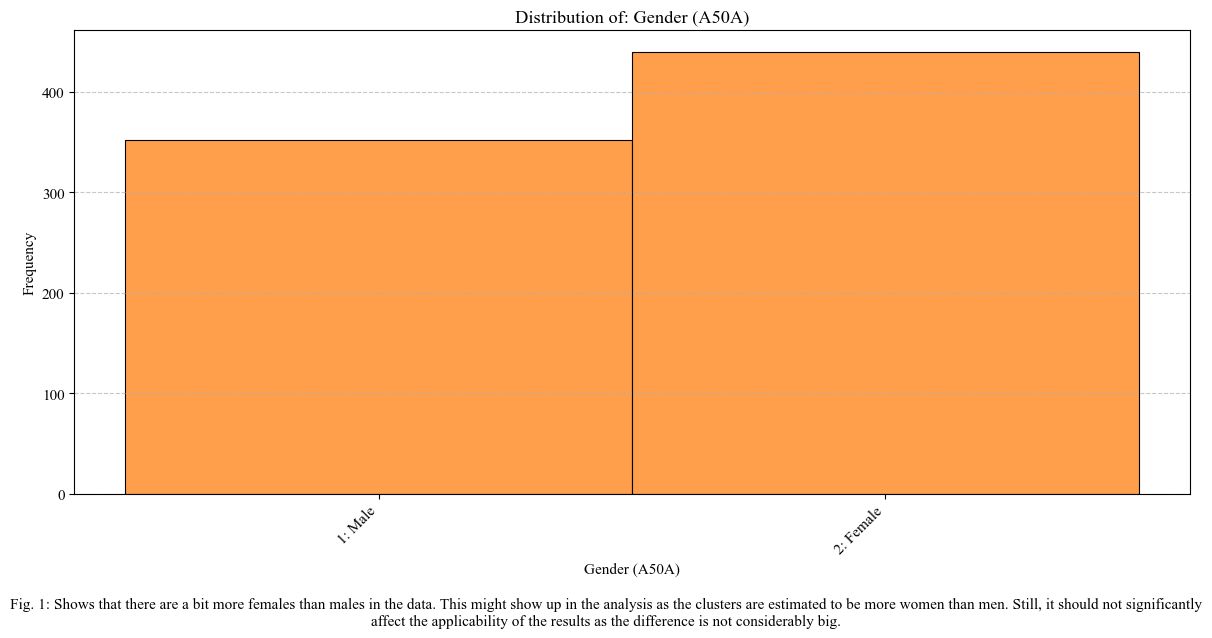

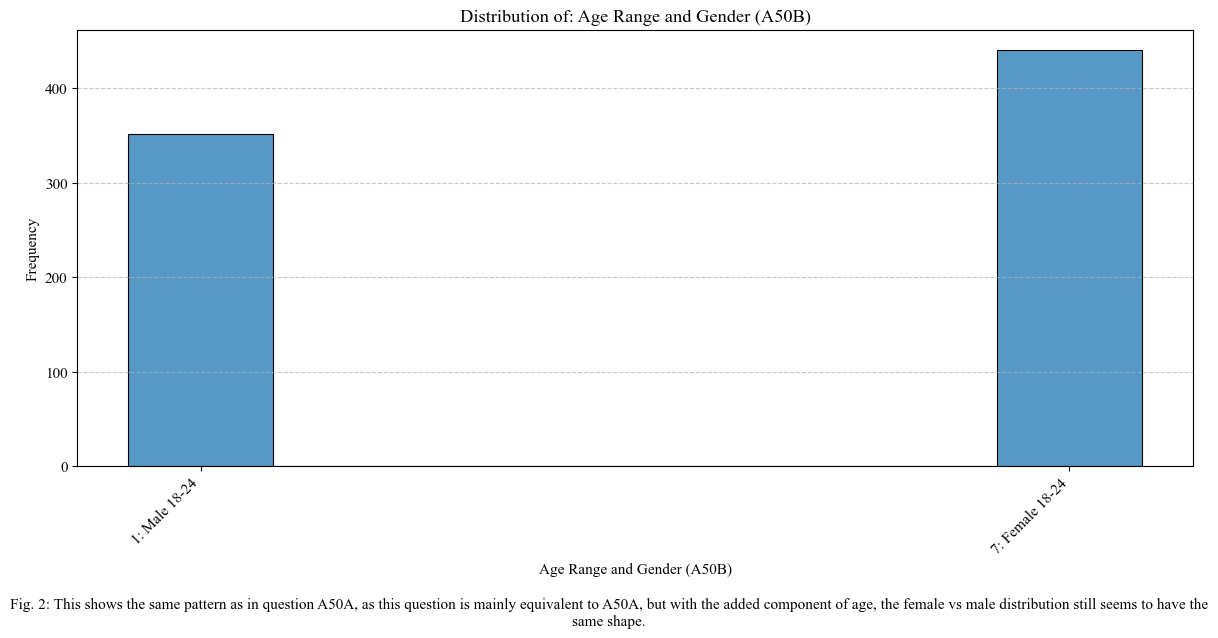

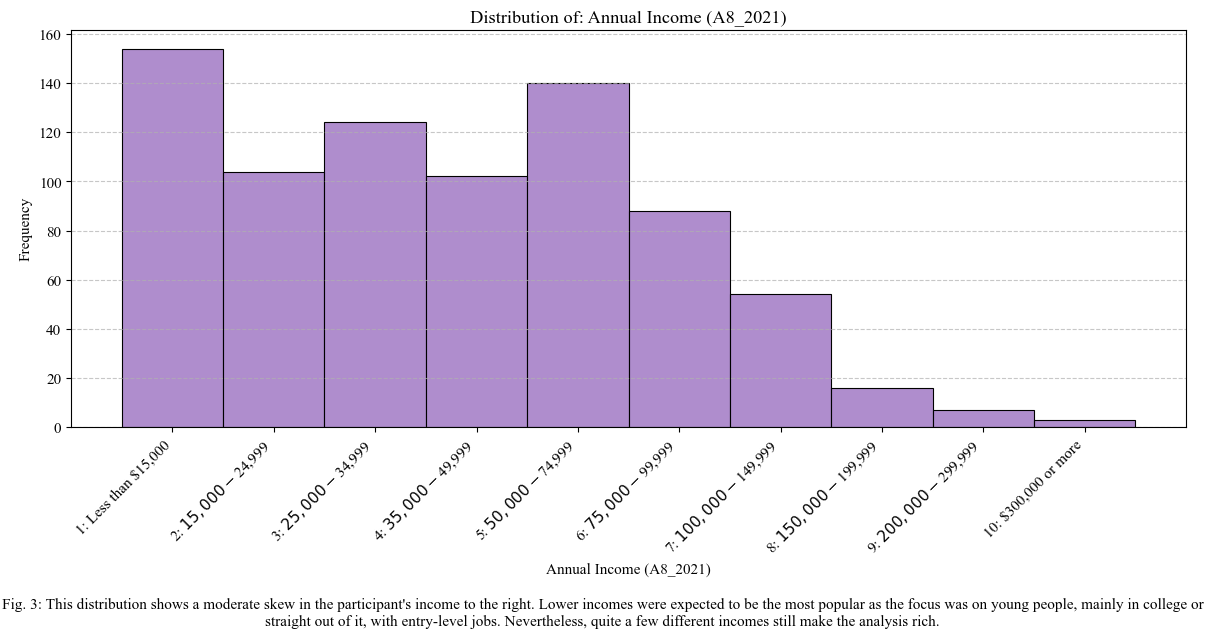

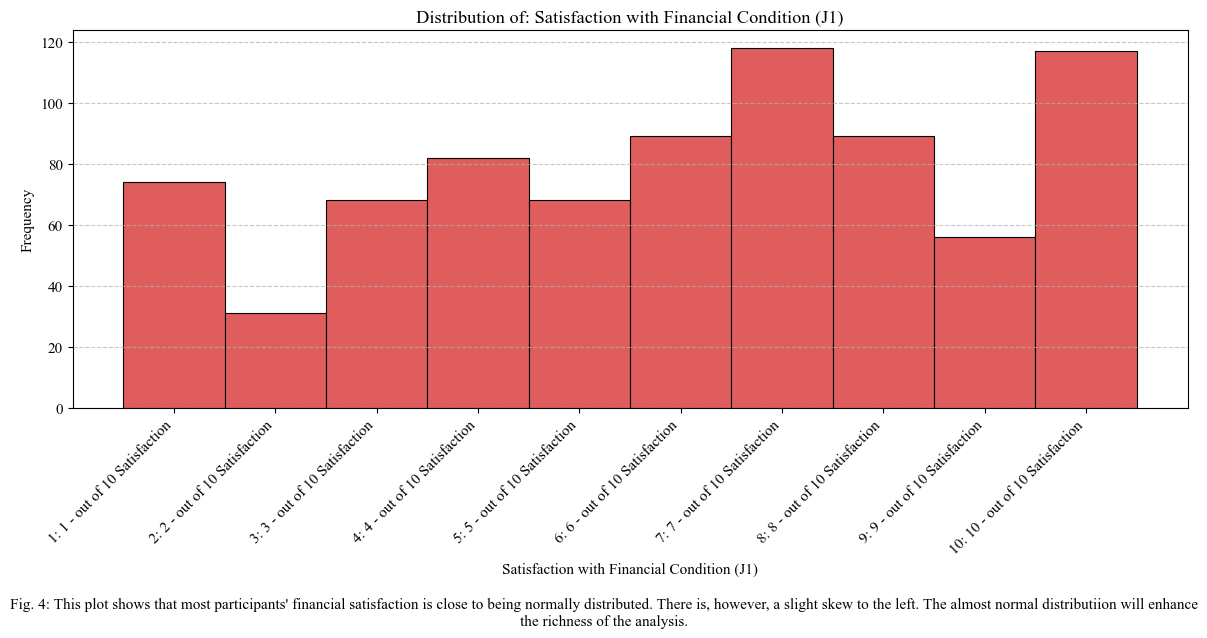

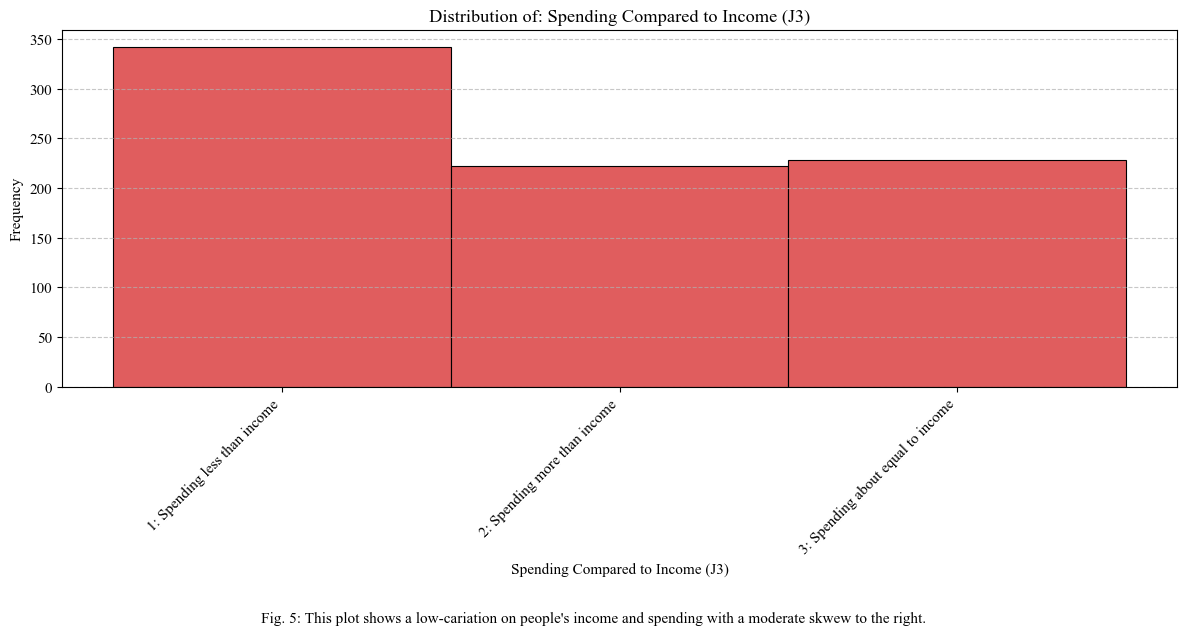

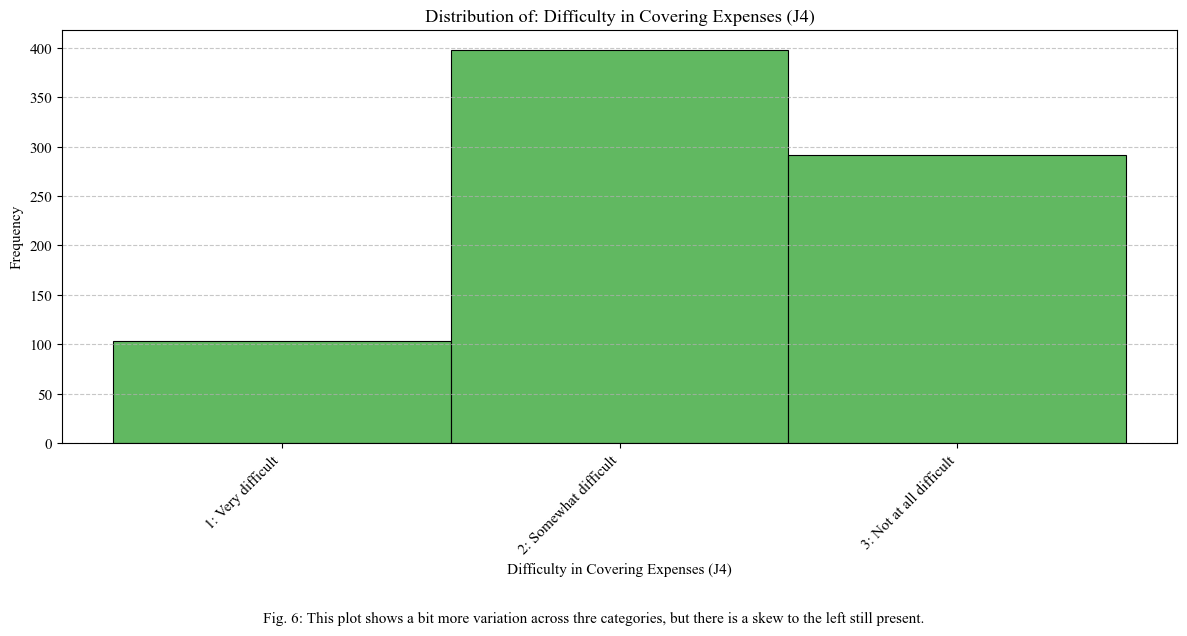

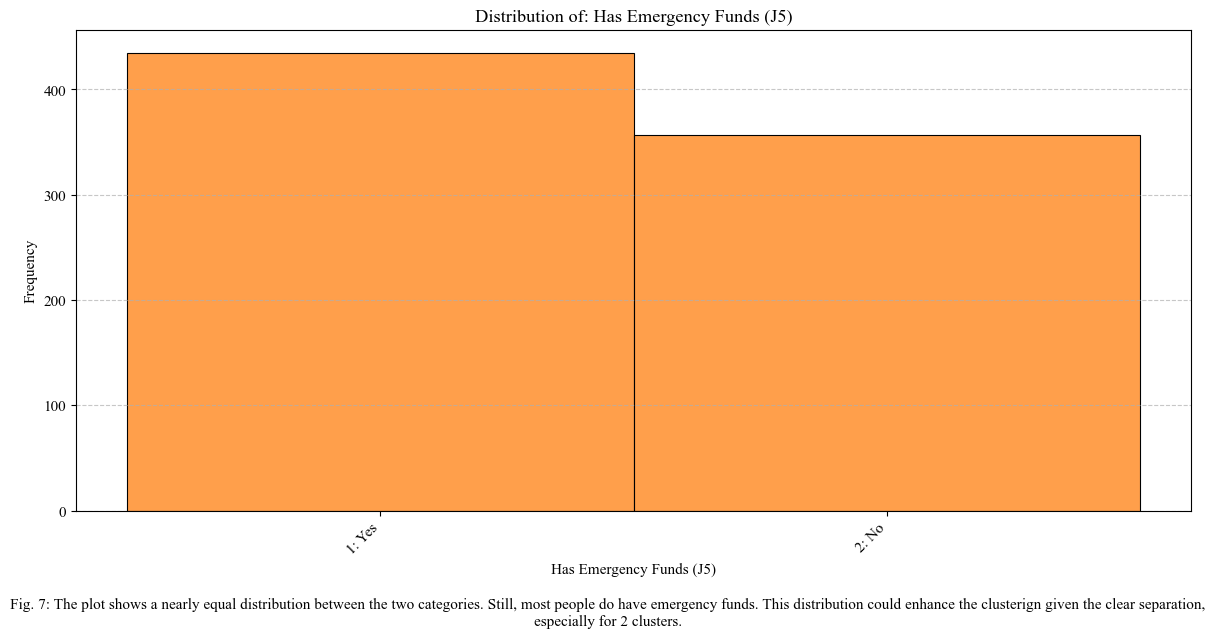

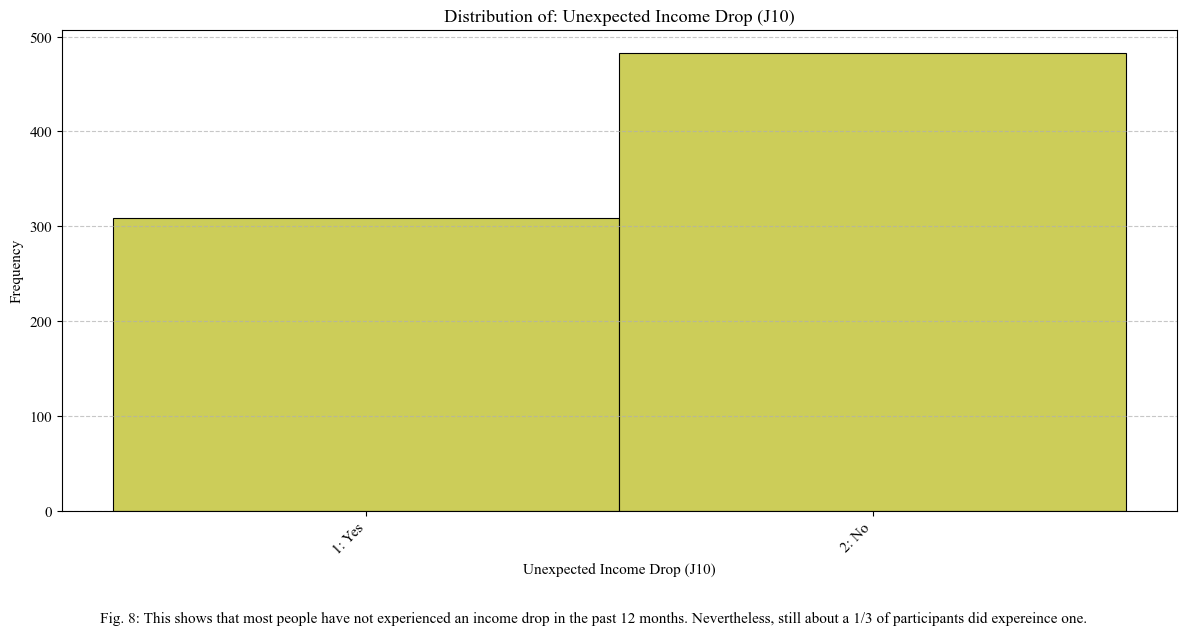

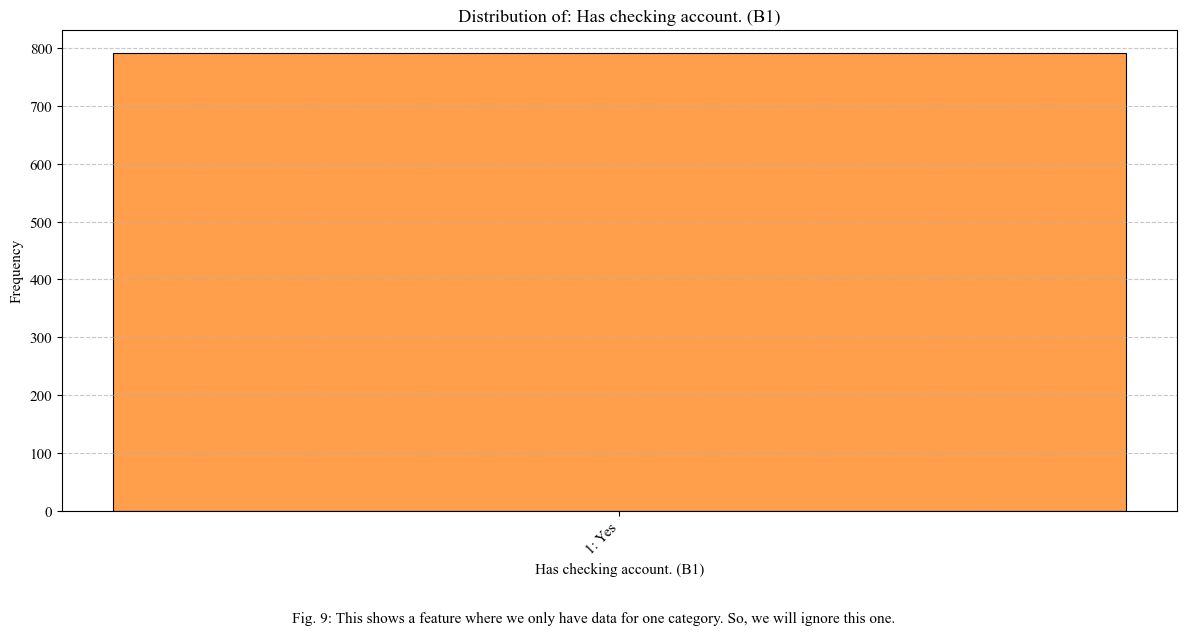

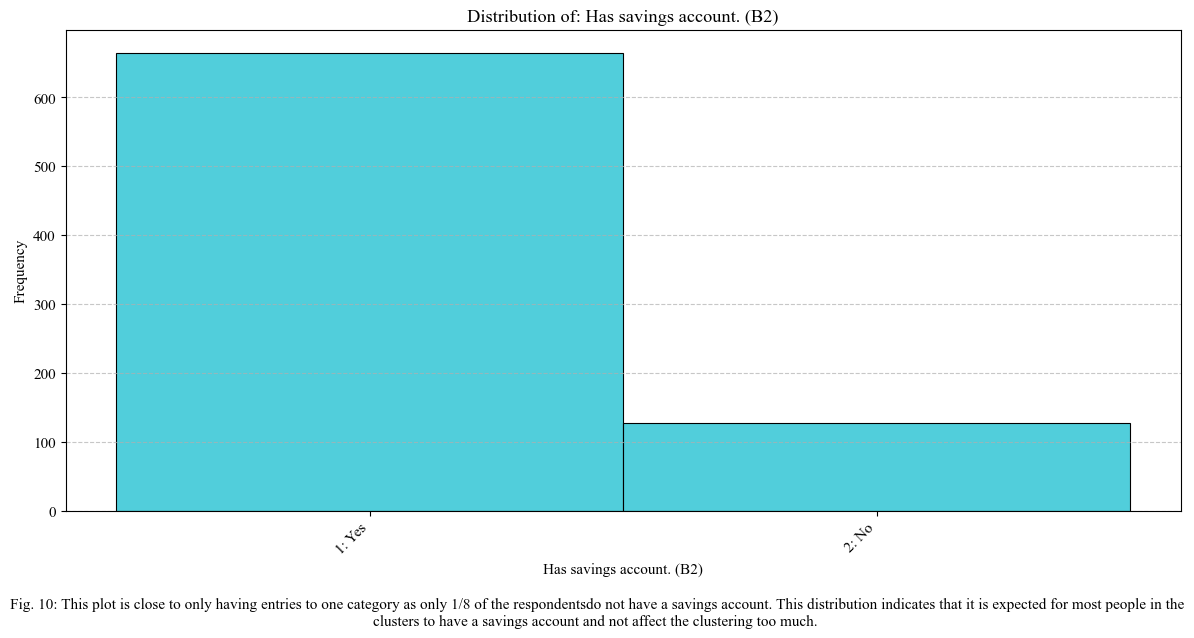

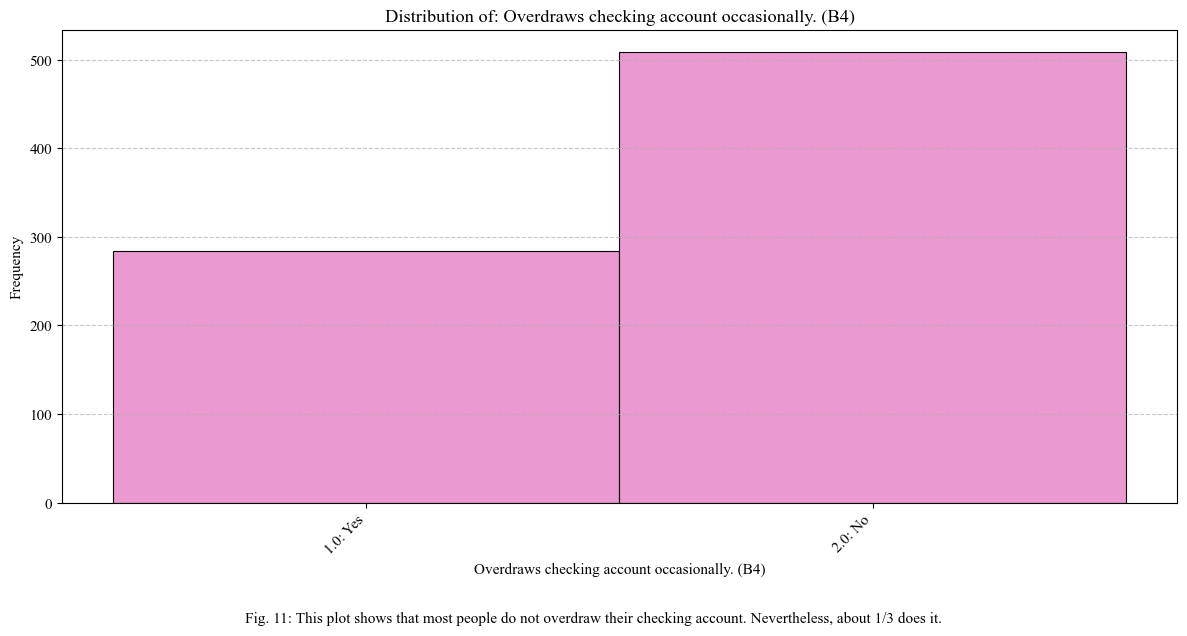

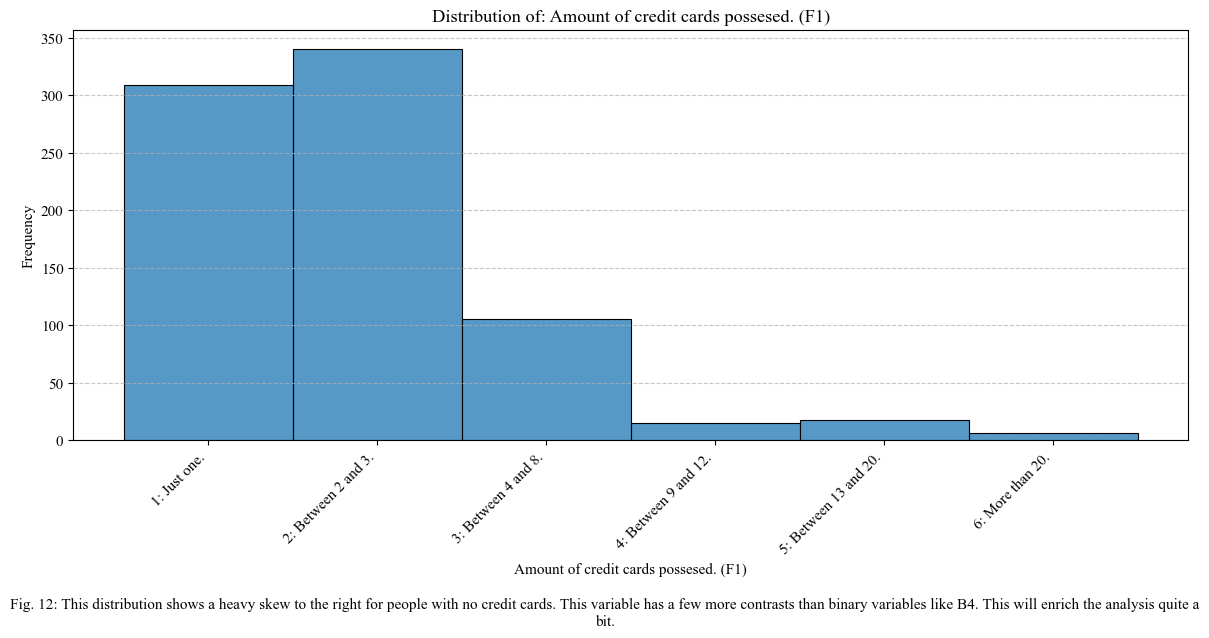

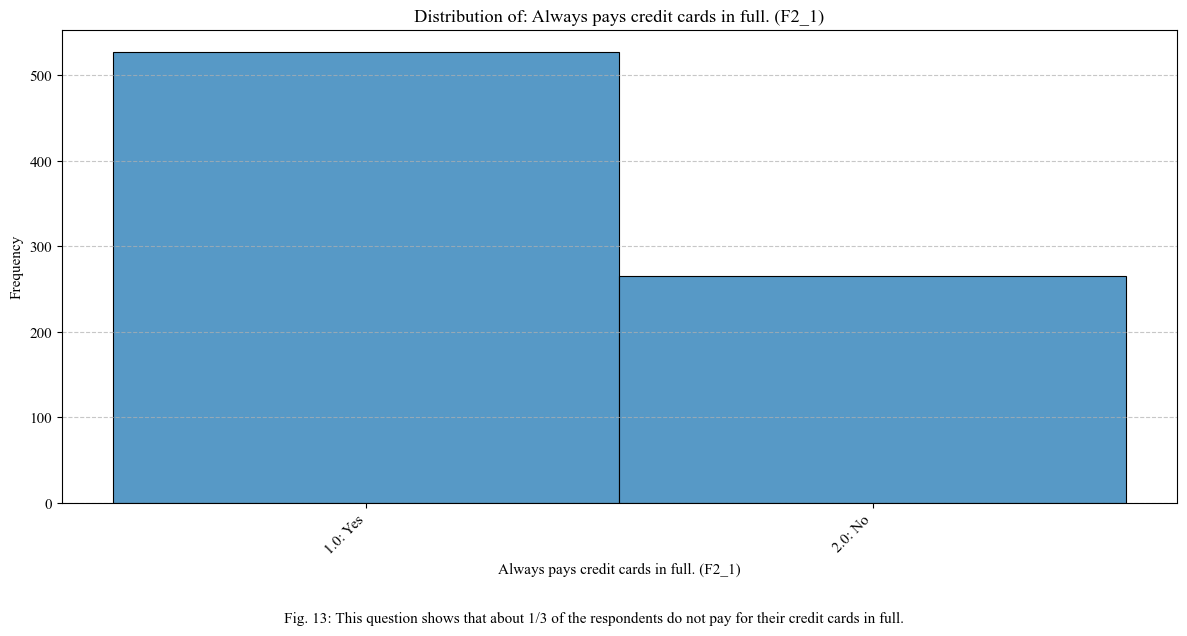

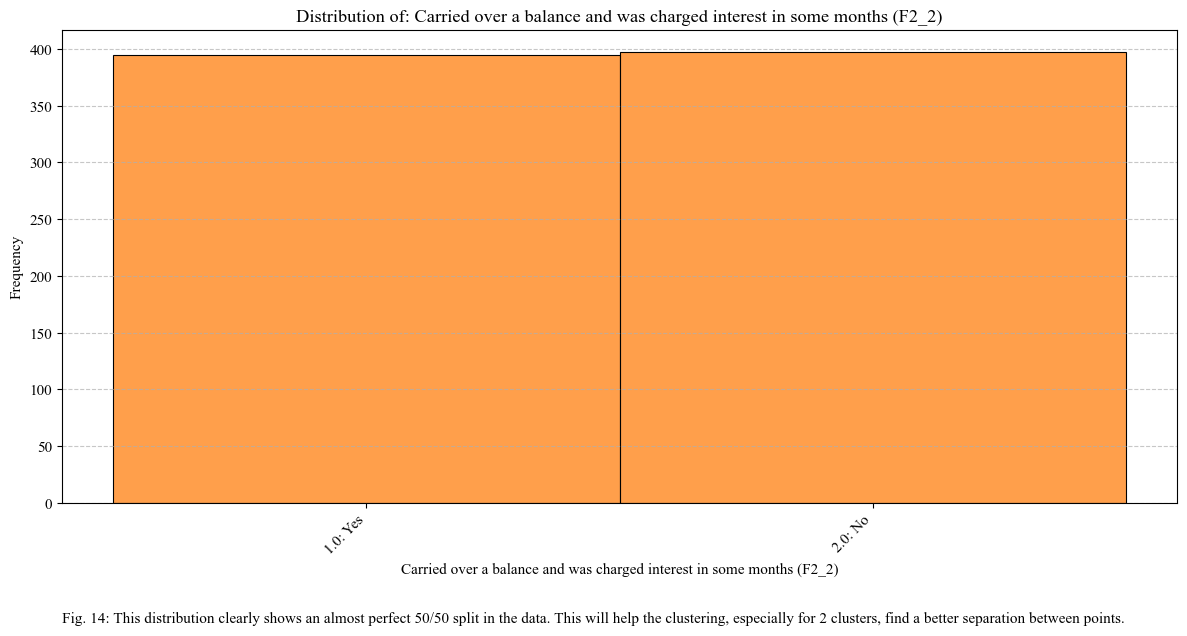

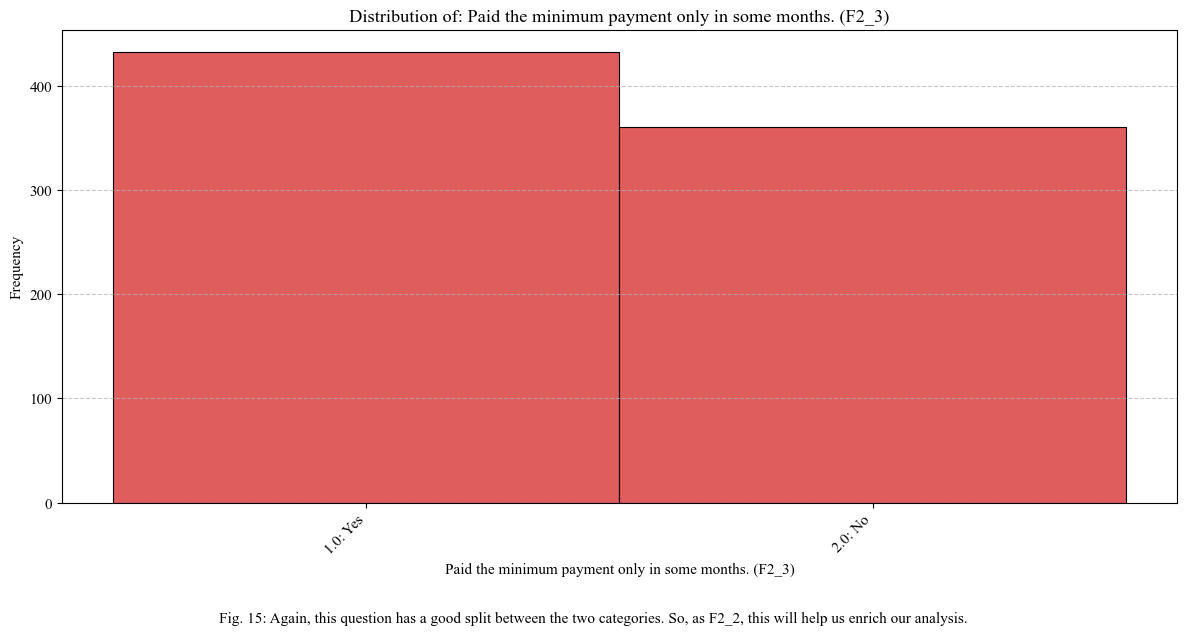

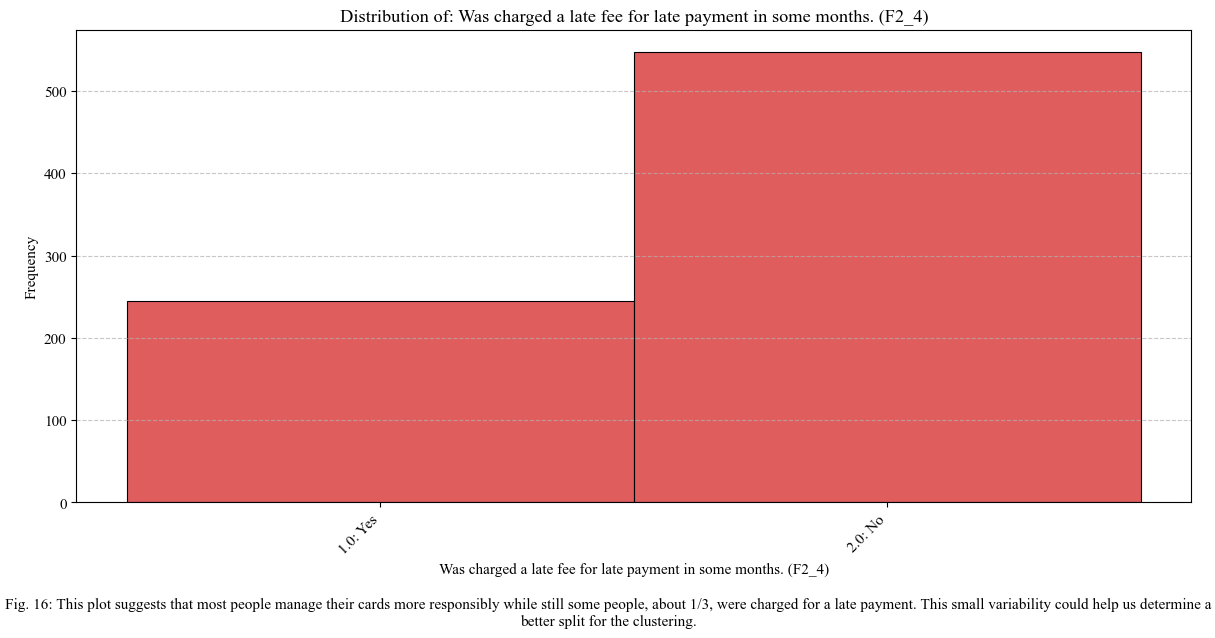

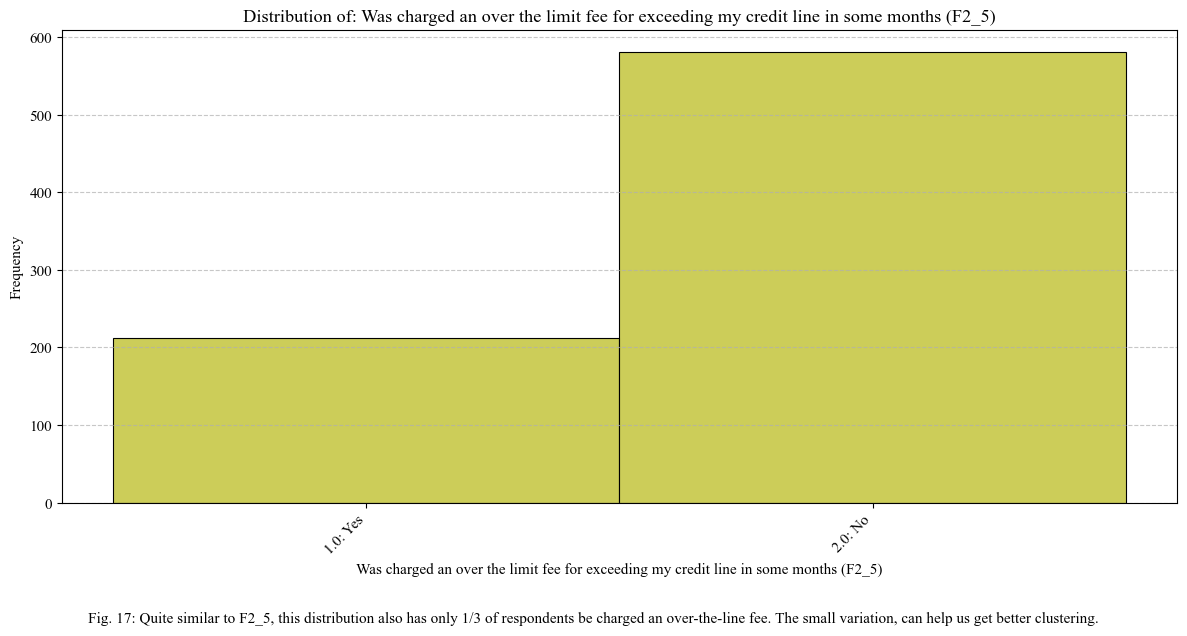

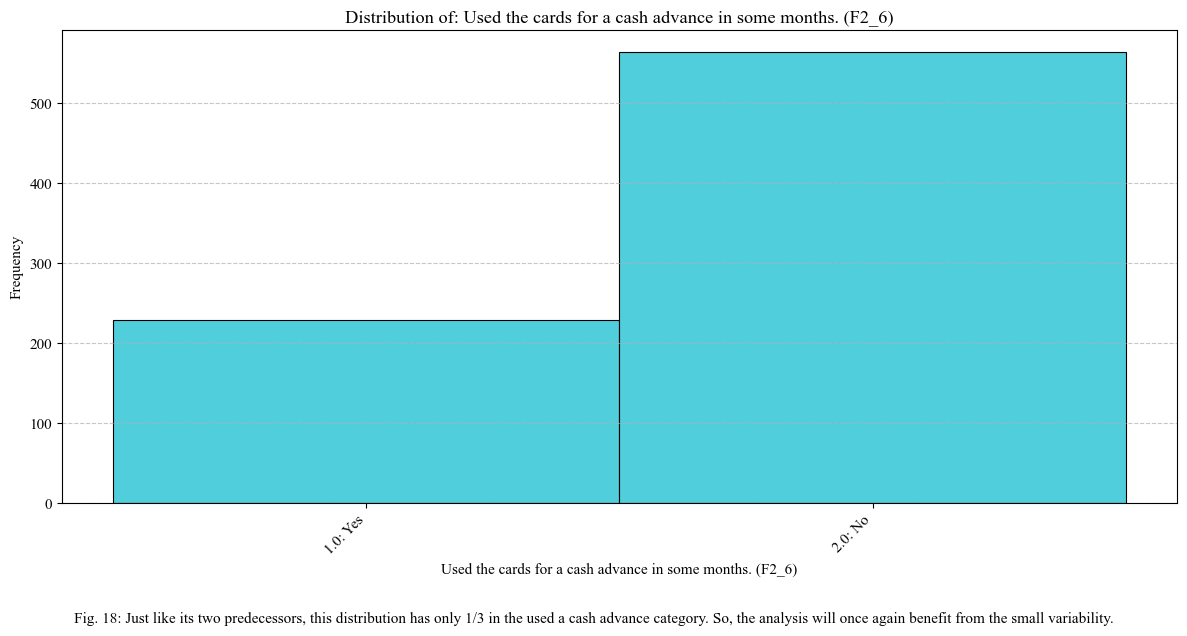

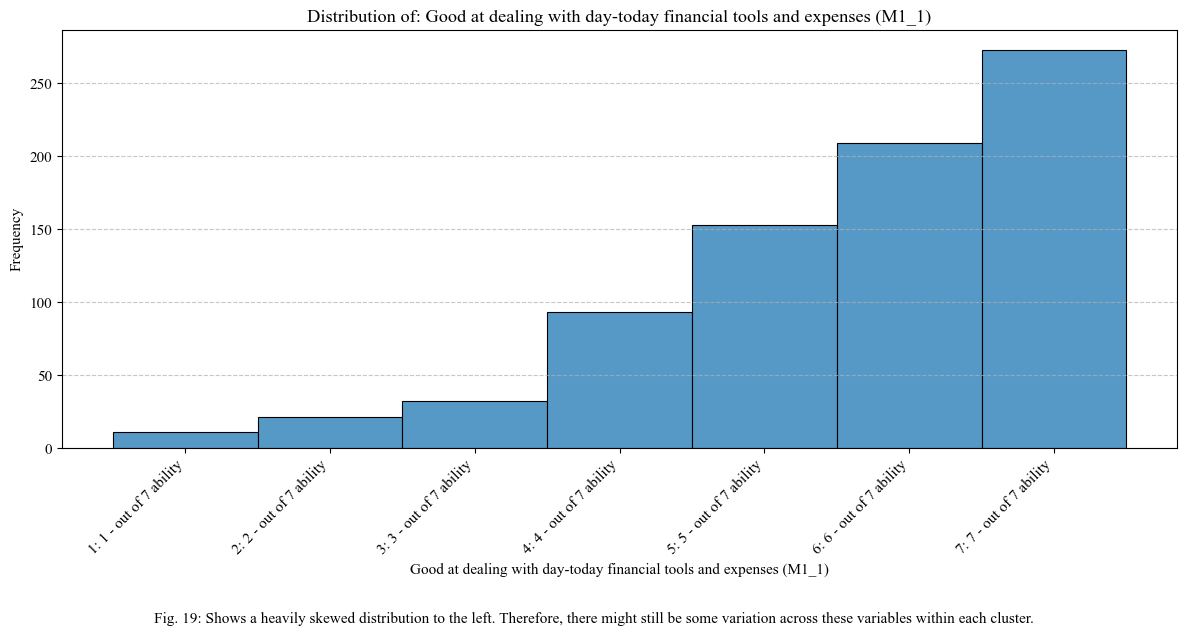

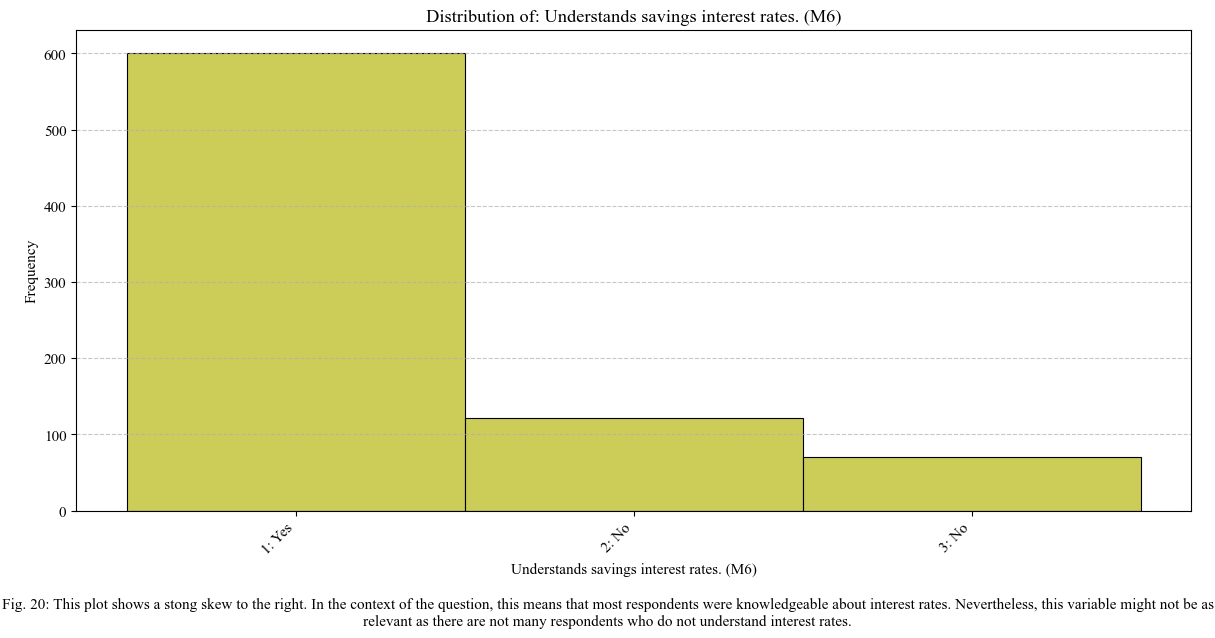

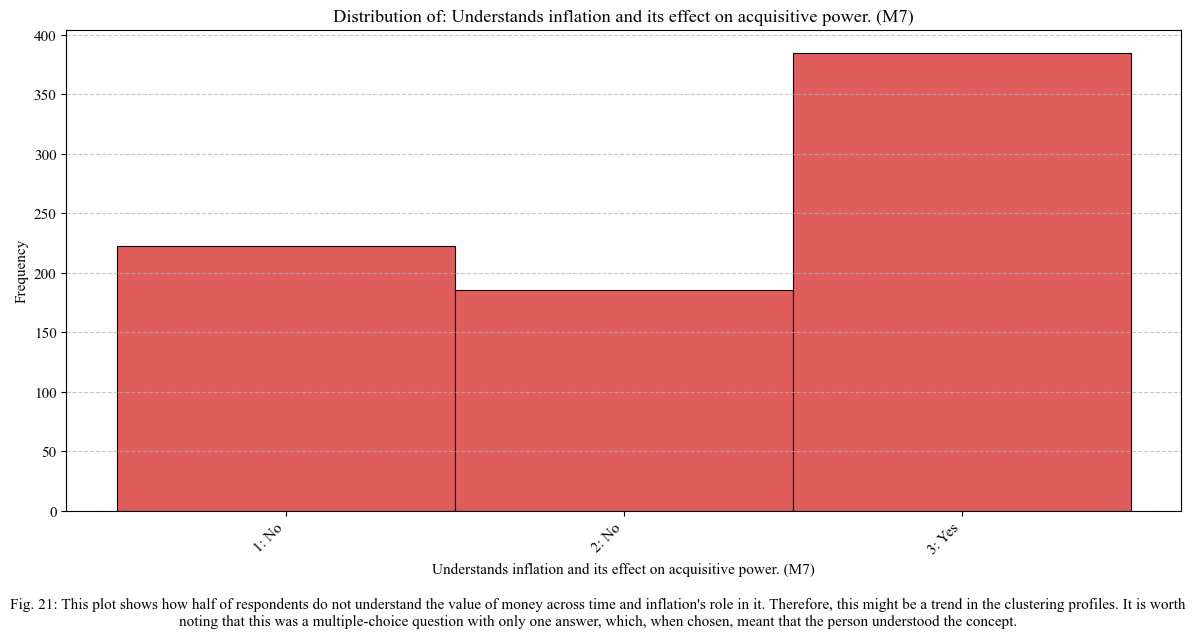

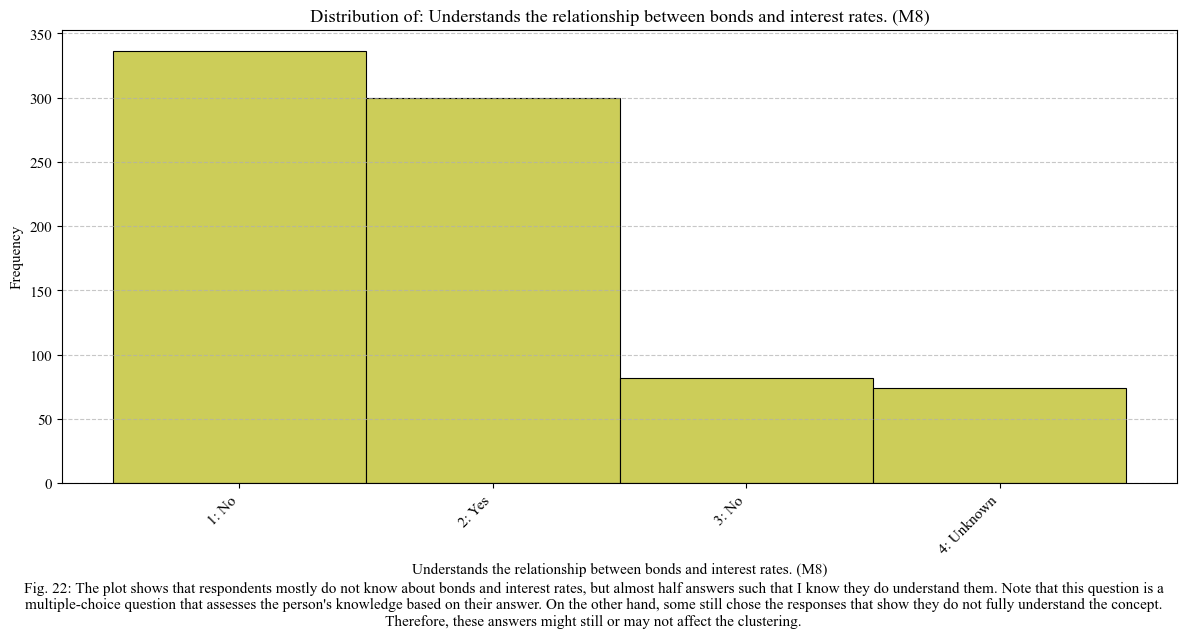

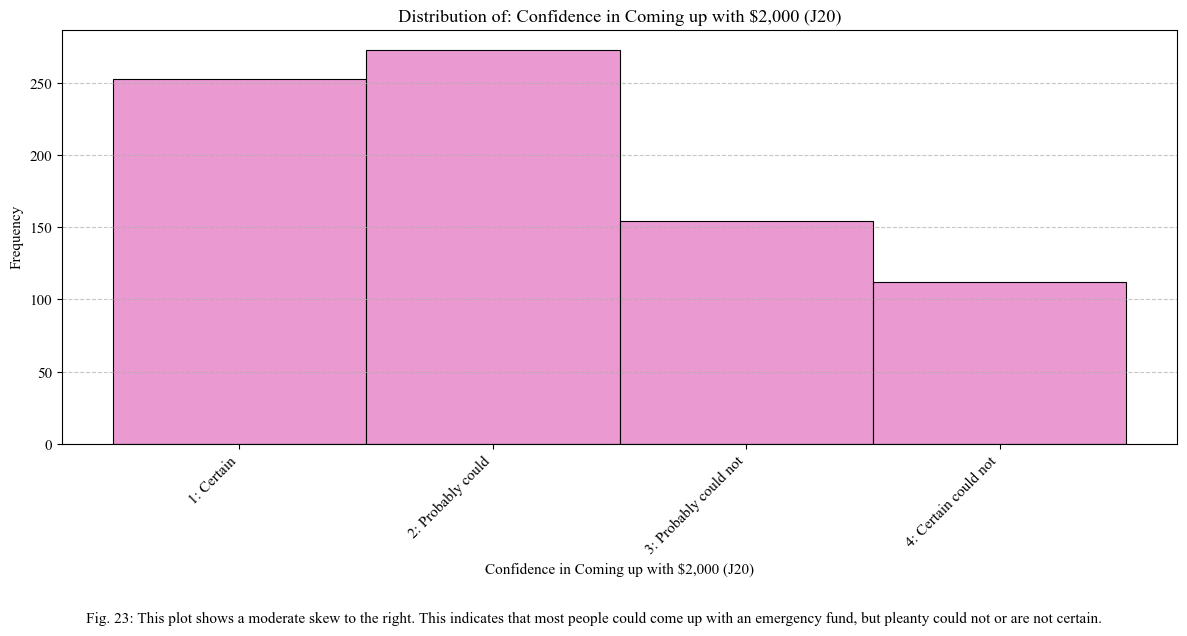

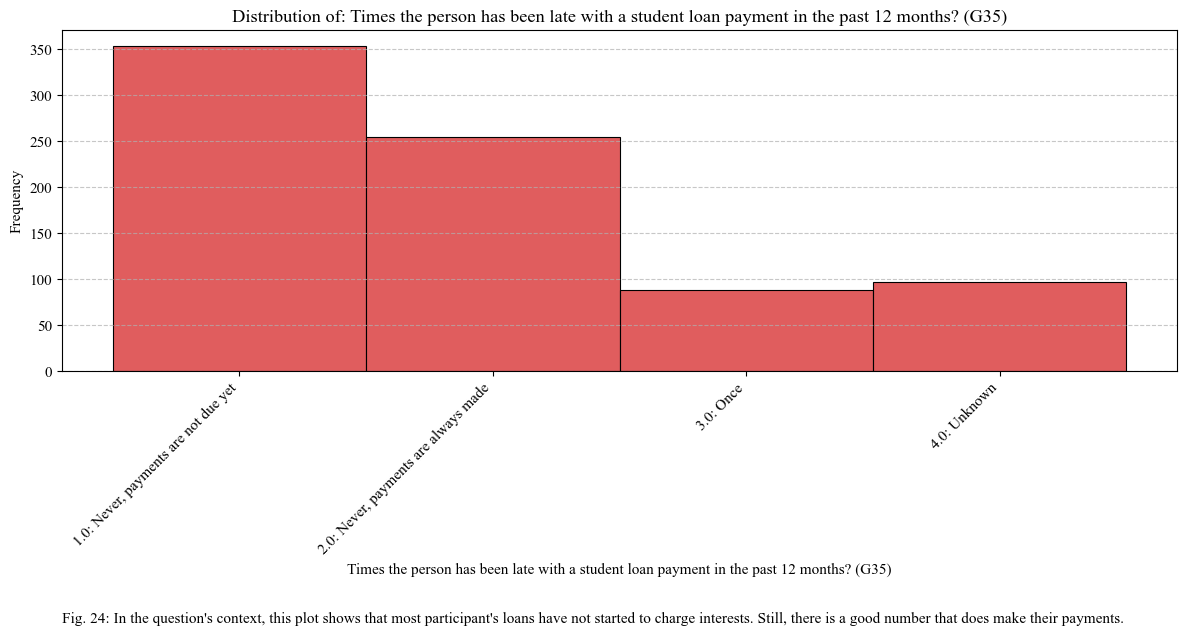

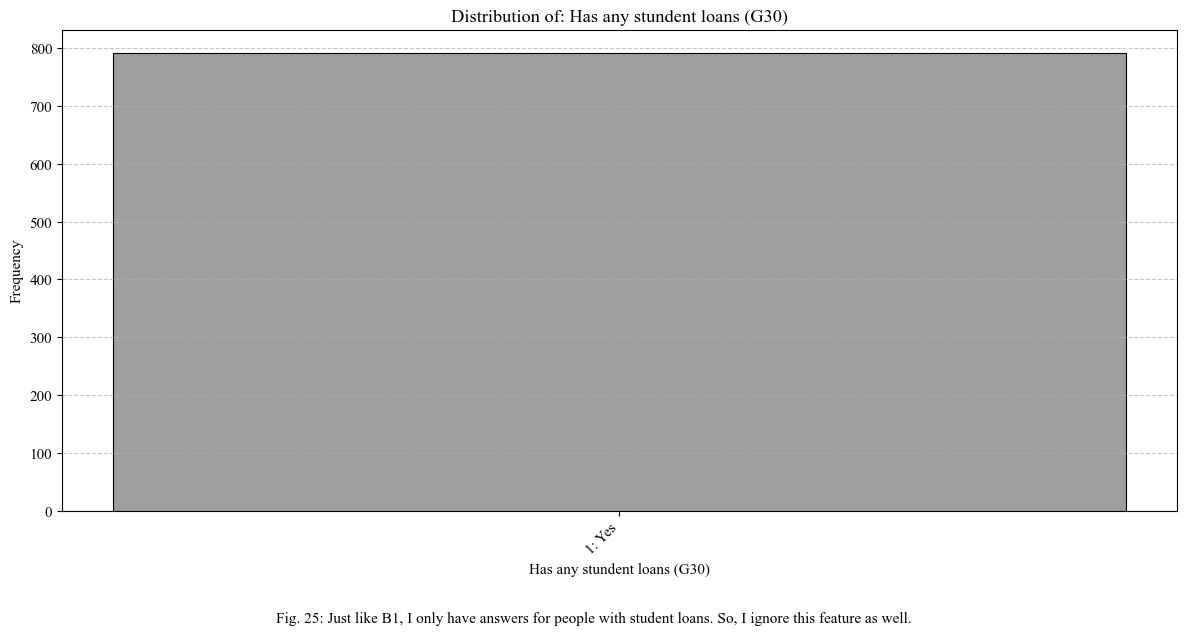

All plots have been saved in the directory: questionnaire_plots


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from random import seed, choice
from matplotlib.colors import TABLEAU_COLORS

# Set random seed for consistent colors
seed(42)

# Function to get a random color
def get_random_color():
    return choice(list(TABLEAU_COLORS.values()))

def generate_questionnaire_plots(data, questionnaire_mapping, question_descriptions, output_dir="questionnaire_plots"):
    """
    Generates and saves distribution plots for both numeric and categorical questionnaire data.

    Parameters:
    - data: DataFrame containing the questionnaire responses.
    - questionnaire_mapping: Dictionary mapping column names to descriptions and answer mappings.
    - question_descriptions: Dictionary containing descriptions for each question.
    - output_dir: Directory to save the plots (default: "questionnaire_plots").
    """

    # Create the specified directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Separate numeric and categorical columns
    numeric_columns = [
        col for col in data.columns if col in questionnaire_mapping and
        all(isinstance(key, (int, float)) for key in questionnaire_mapping[col]["answers"].keys())
    ]
    categorical_columns = [
        col for col in data.columns if col in questionnaire_mapping and
        any(isinstance(key, str) or not isinstance(key, (int, float)) for key in questionnaire_mapping[col]["answers"].keys())
    ]

    # Initialize figure counter
    figure_counter = 1

    # Plot histograms for numeric columns
    for col in numeric_columns:
        question_info = questionnaire_mapping[col]
        question_desc = question_info["description"]
        answer_mapping = question_info["answers"]
        color = get_random_color()

        plt.figure(figsize=(12, 6))
        sns.histplot(
            data[col],
            kde=False,
            bins=len(answer_mapping),
            color=color,
            edgecolor="black",
            linewidth=0.8,
            discrete=True
        )
        plt.title(f"Distribution of: {question_desc} ({col})")
        plt.xlabel(f"{question_desc} ({col})")
        plt.ylabel("Frequency")

        # Update x-axis ticks with human-readable answers
        plt.xticks(
            ticks=sorted(data[col].dropna().unique()),
            labels=[
                f"{val}: {answer_mapping.get(val, 'Unknown')}"
                for val in sorted(data[col].dropna().unique())
            ],
            rotation=45,
            ha="right"
        )
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()

        # Add caption below the graph
        plt.figtext(
            0.5,
            -0.05,
            f"Fig. {figure_counter}: {question_descriptions.get(col, 'No description available.')}",
            wrap=True,
            ha="center",
            fontsize=11
        )

        # Save the figure
        filename = os.path.join(output_dir, f"Fig_{figure_counter}_{col}_distribution.png")
        plt.savefig(filename, format='png', dpi=300, bbox_inches="tight")
        plt.show()

        figure_counter += 1

    # Plot bar plots for categorical columns
    for col in categorical_columns:
        question_info = questionnaire_mapping[col]
        question_desc = question_info["description"]
        answer_mapping = question_info["answers"]
        category_counts = data[col].value_counts().sort_index()

        plt.figure(figsize=(12, 6))
        sns.barplot(
            x=category_counts.index,
            y=category_counts.values,
            palette=sns.color_palette("husl", len(category_counts))
        )
        plt.title(f"Distribution of: {question_desc} ({col})")
        plt.xlabel(f"{question_desc} ({col})")
        plt.ylabel("Frequency")

        # Add human-readable labels for x-axis
        plt.xticks(
            ticks=range(len(category_counts)),
            labels=[
                f"{val}: {answer_mapping.get(val, 'Unknown')}"
                for val in category_counts.index
            ],
            rotation=45,
            ha="right"
        )
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()

        # Add caption below the graph
        plt.figtext(
            0.5,
            -0.05,
            f"Fig. {figure_counter}: {question_descriptions.get(col, 'No description available.')}",
            wrap=True,
            ha="center",
            fontsize=11
        )

        # Save the figure
        filename = os.path.join(output_dir, f"Fig_{figure_counter}_{col}_distribution.png")
        plt.savefig(filename, format='png', dpi=300, bbox_inches="tight")
        plt.show()

        figure_counter += 1

    print(f"All plots have been saved in the directory: {output_dir}")

generate_questionnaire_plots(data, questionnaire_mapping, question_descriptions, output_dir="questionnaire_plots")

We clean the heavily skewed questions.

In [136]:
data.drop(columns=["B1","G30"], inplace=True, errors="ignore")  # Dropping columns with entries in one category.

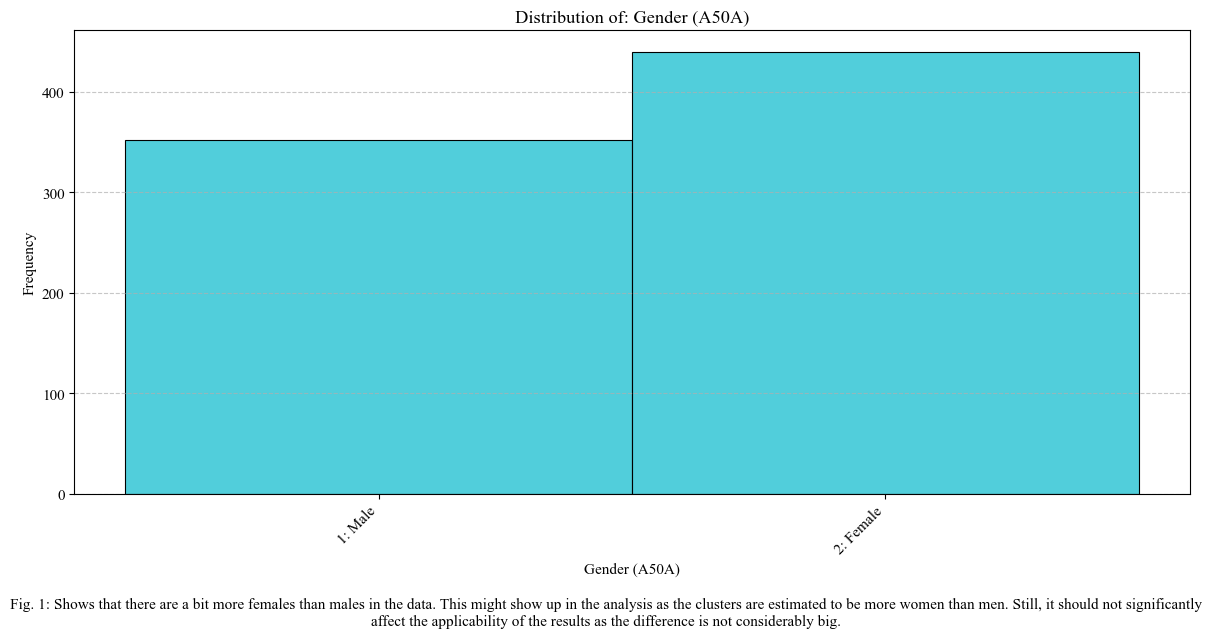

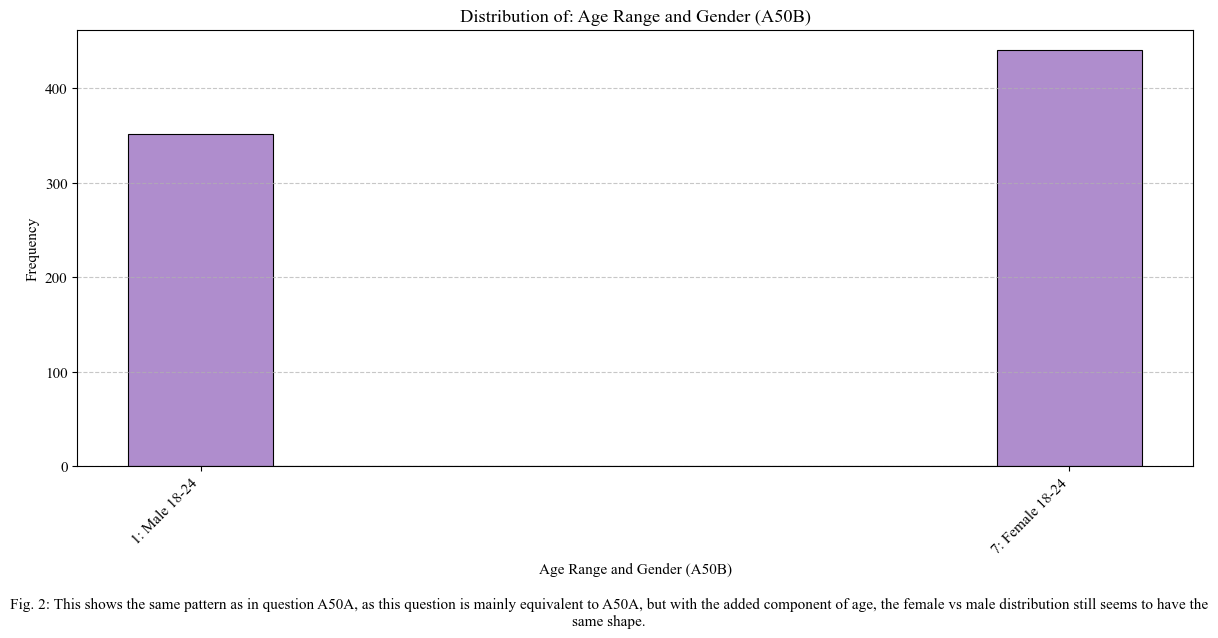

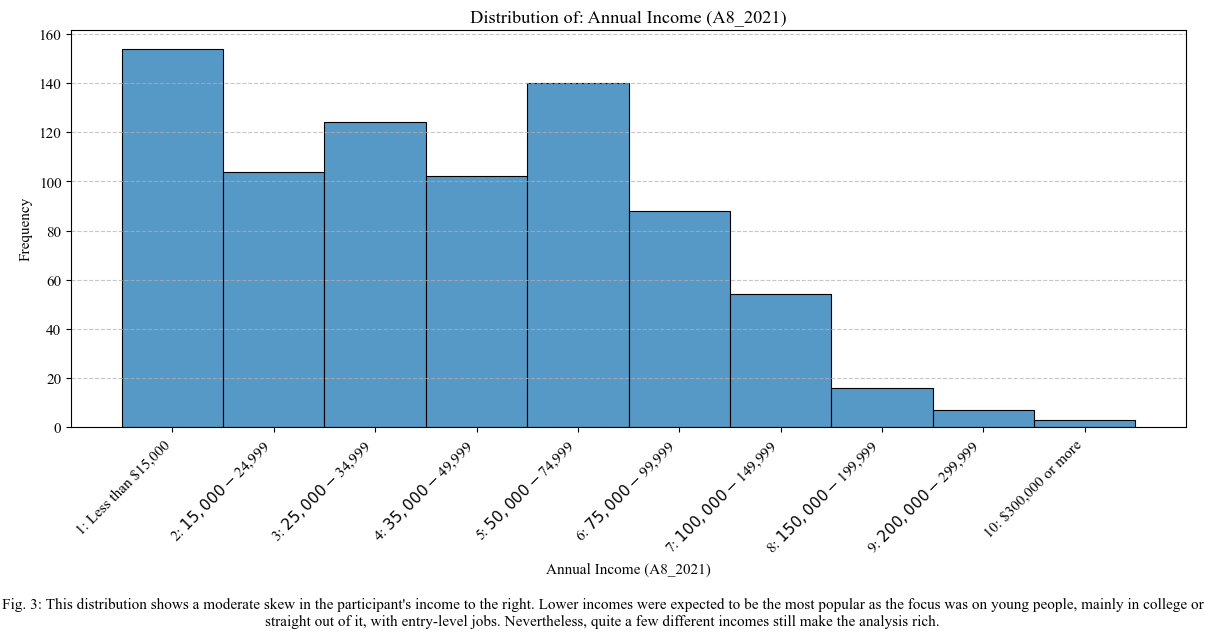

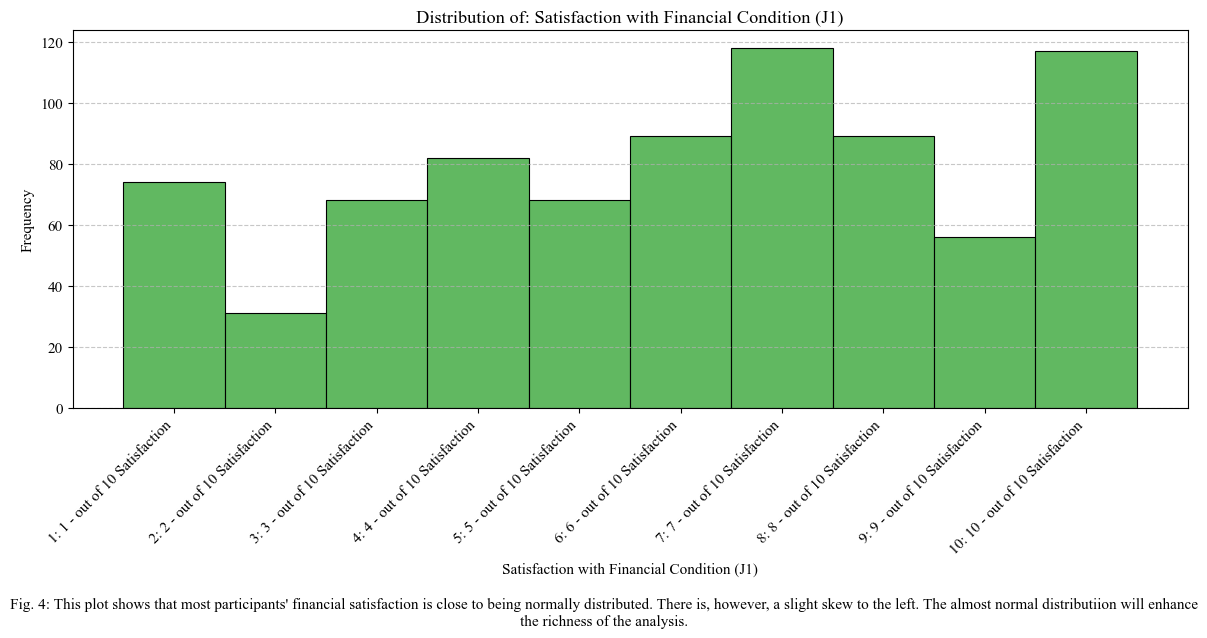

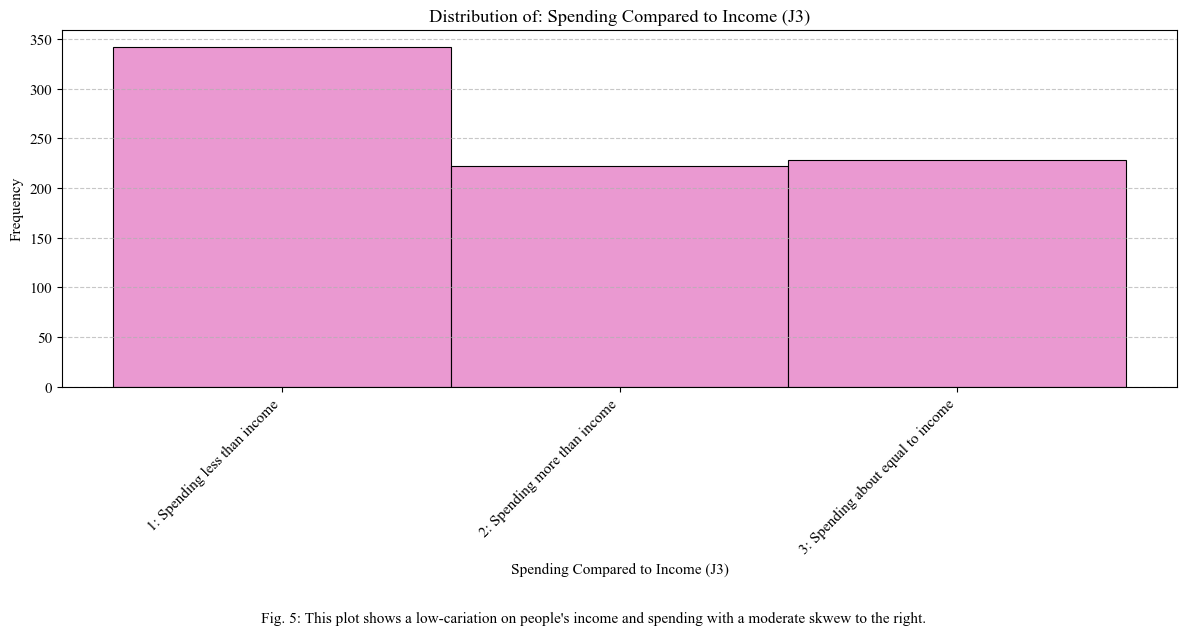

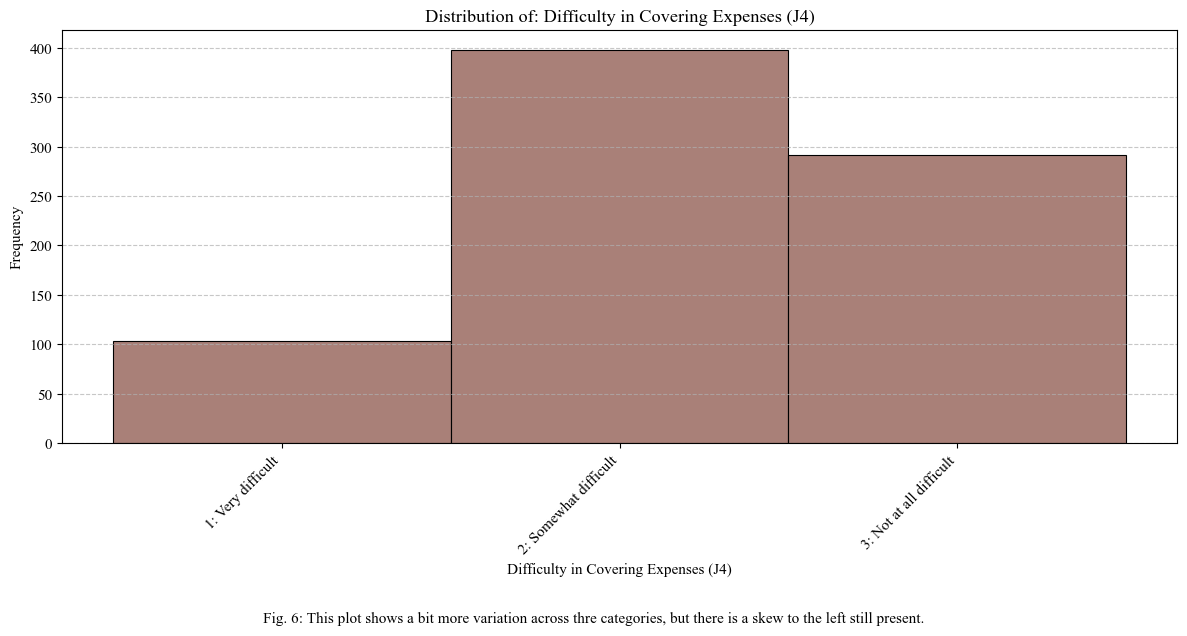

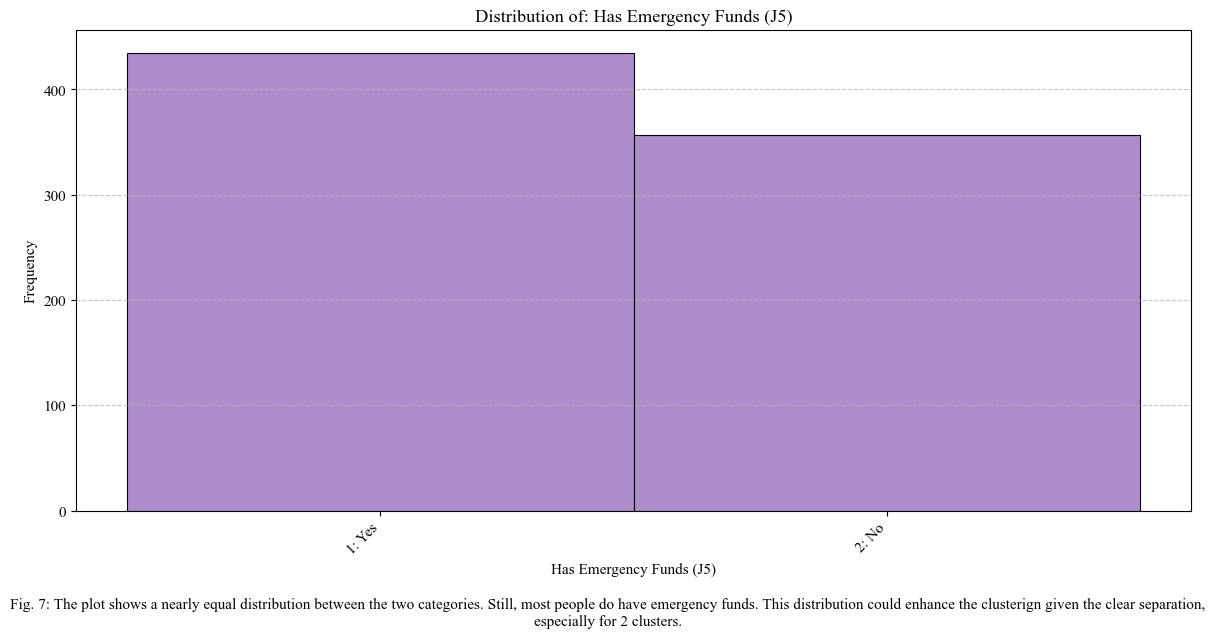

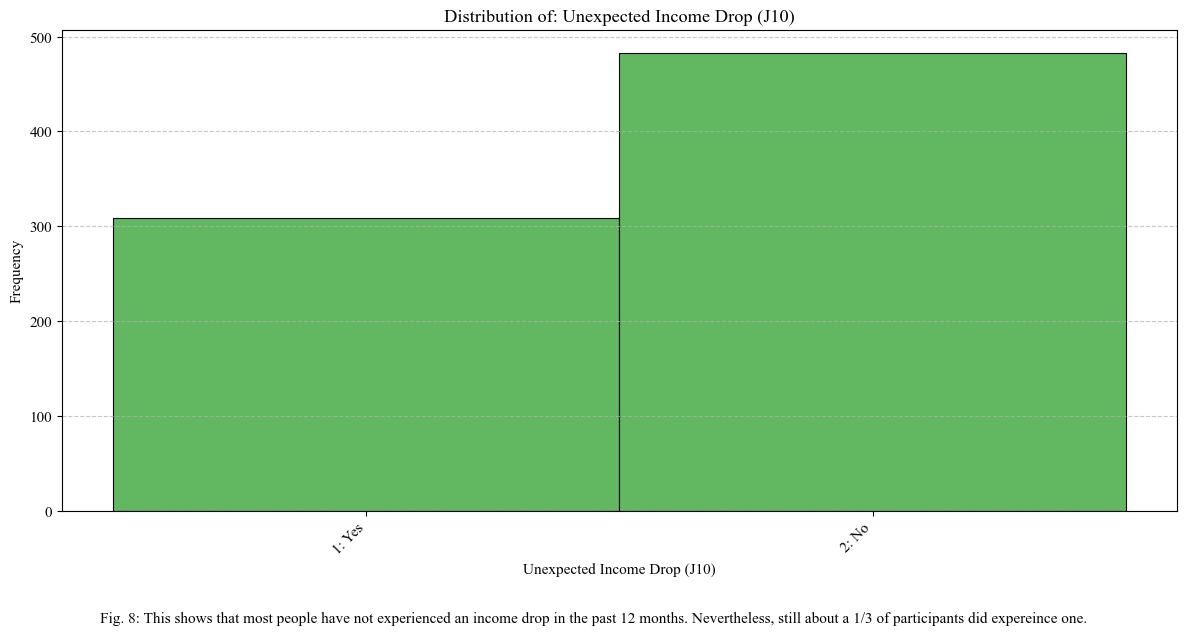

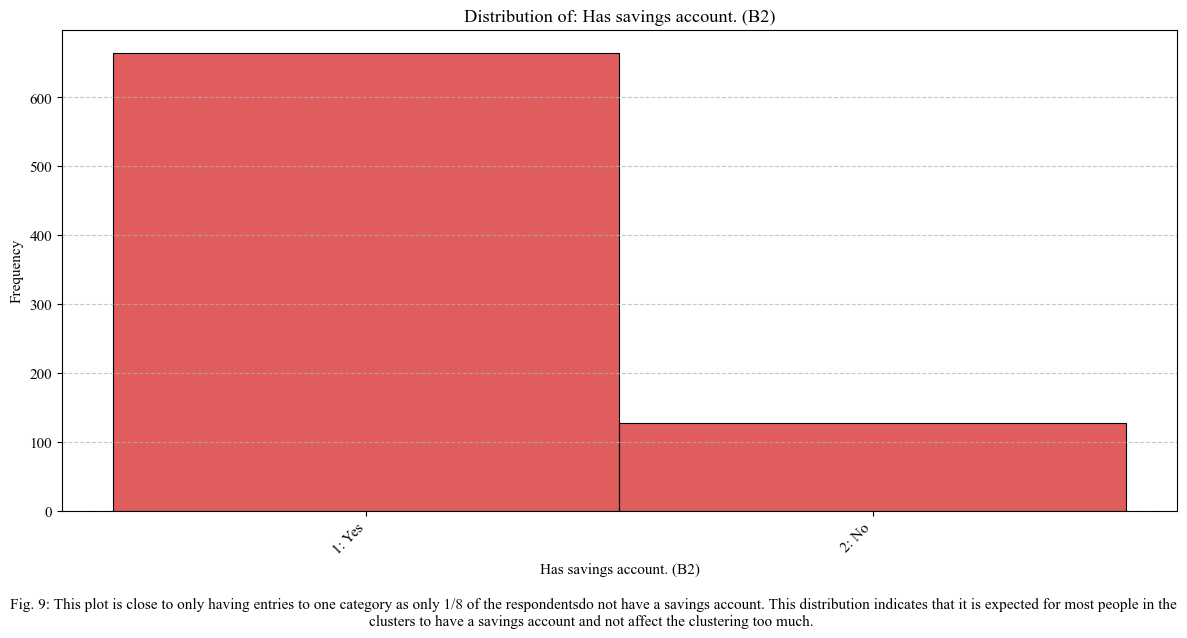

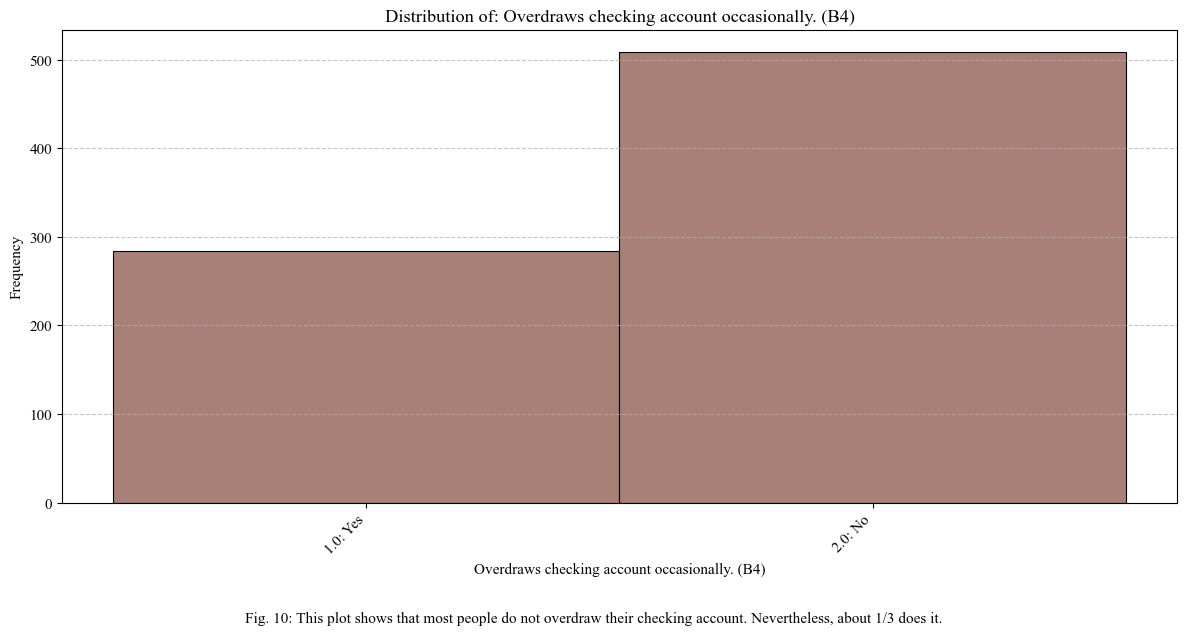

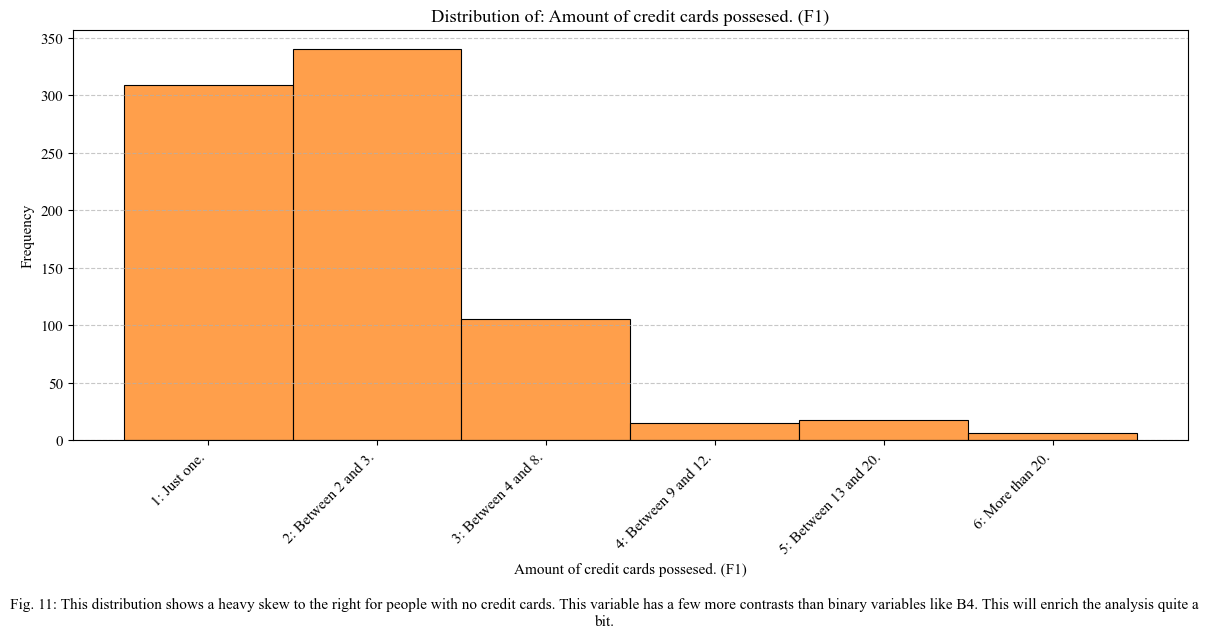

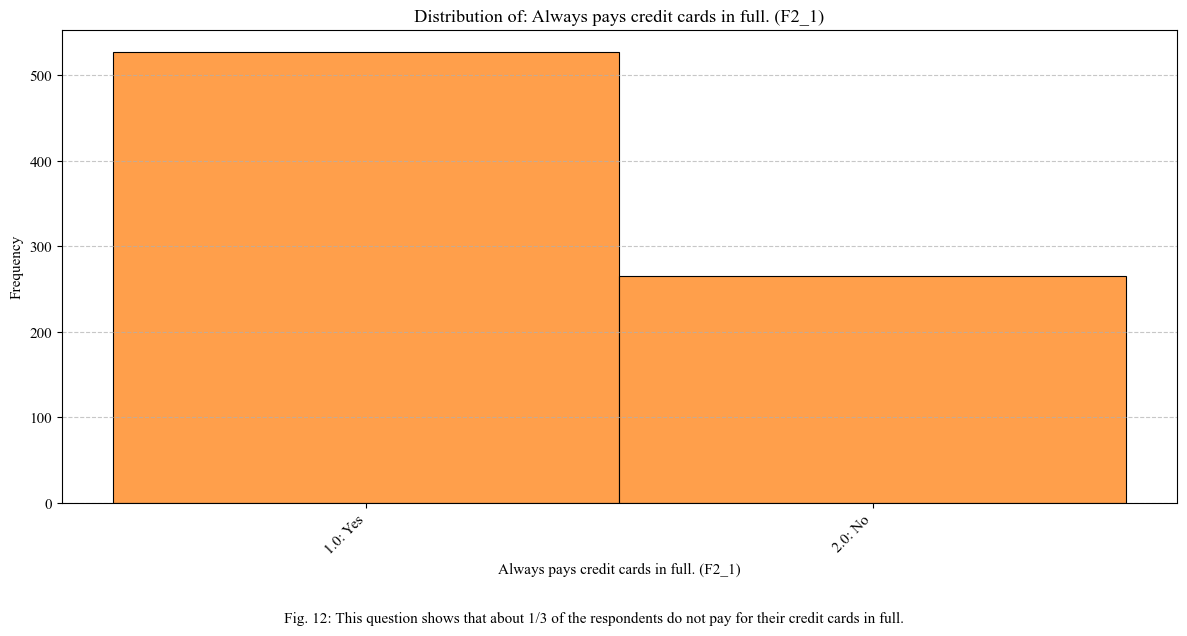

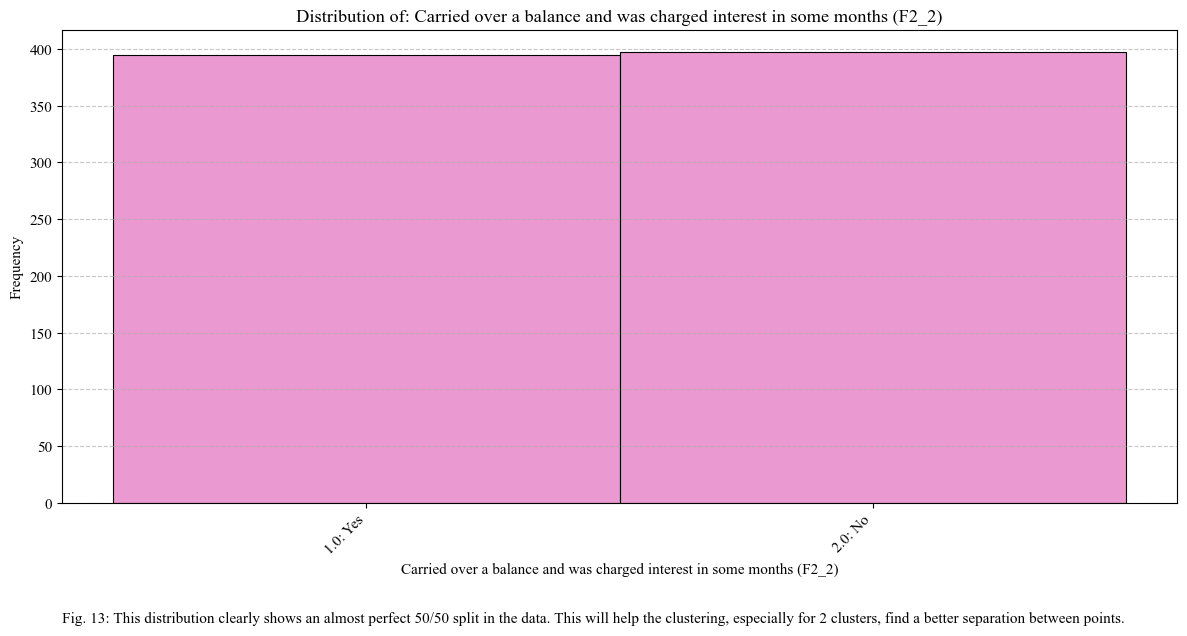

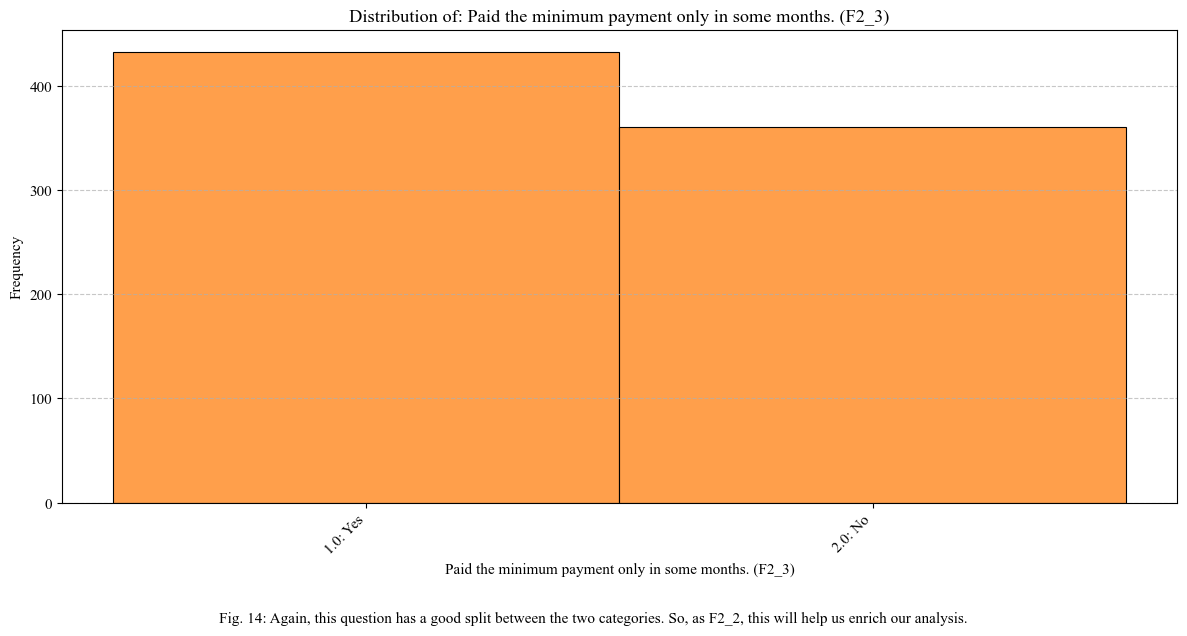

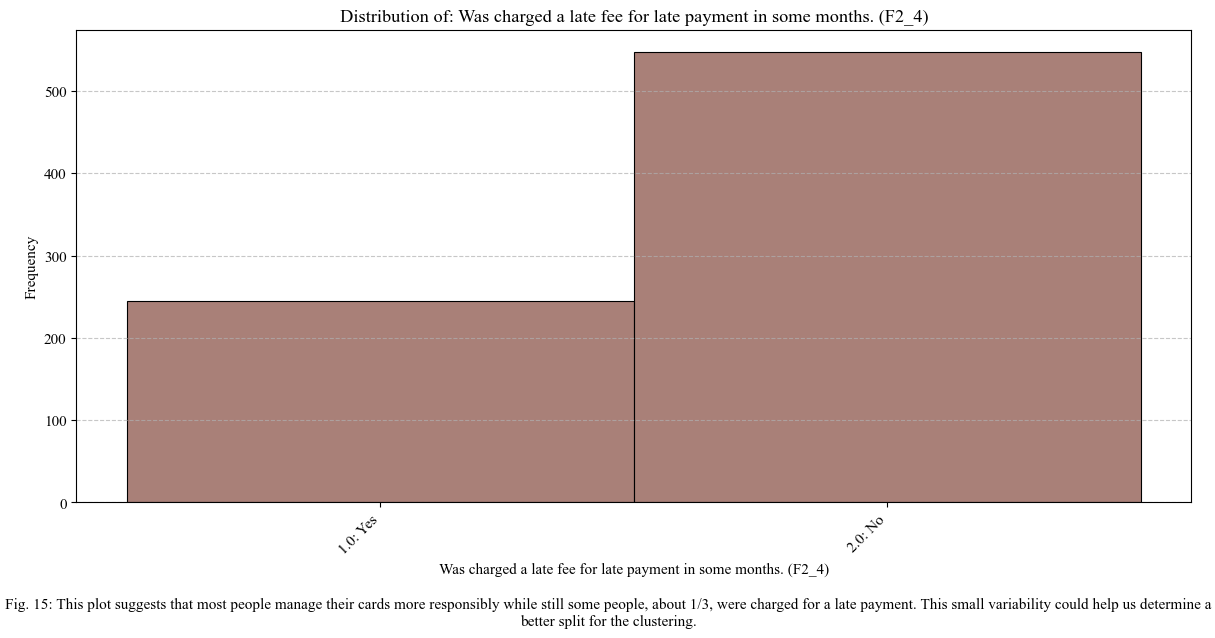

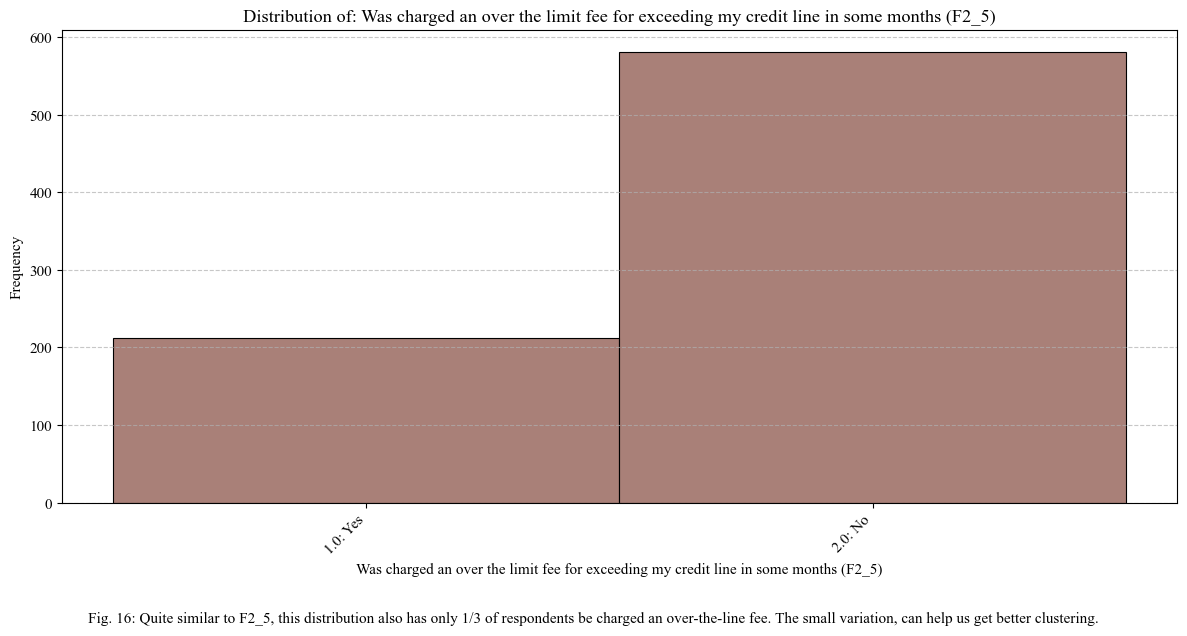

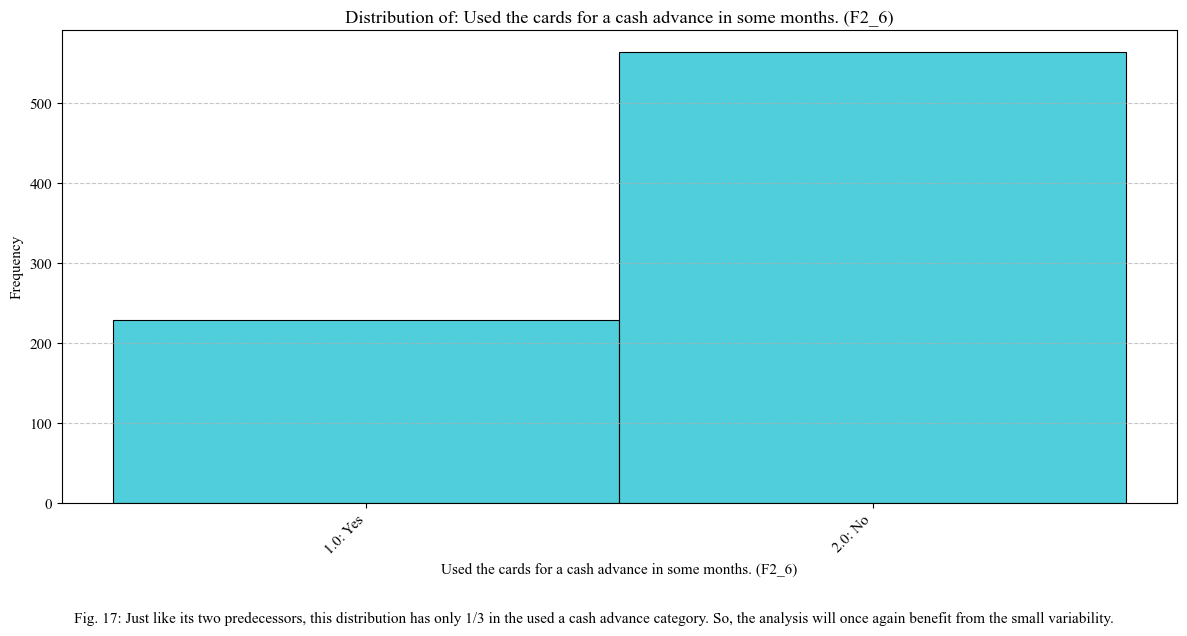

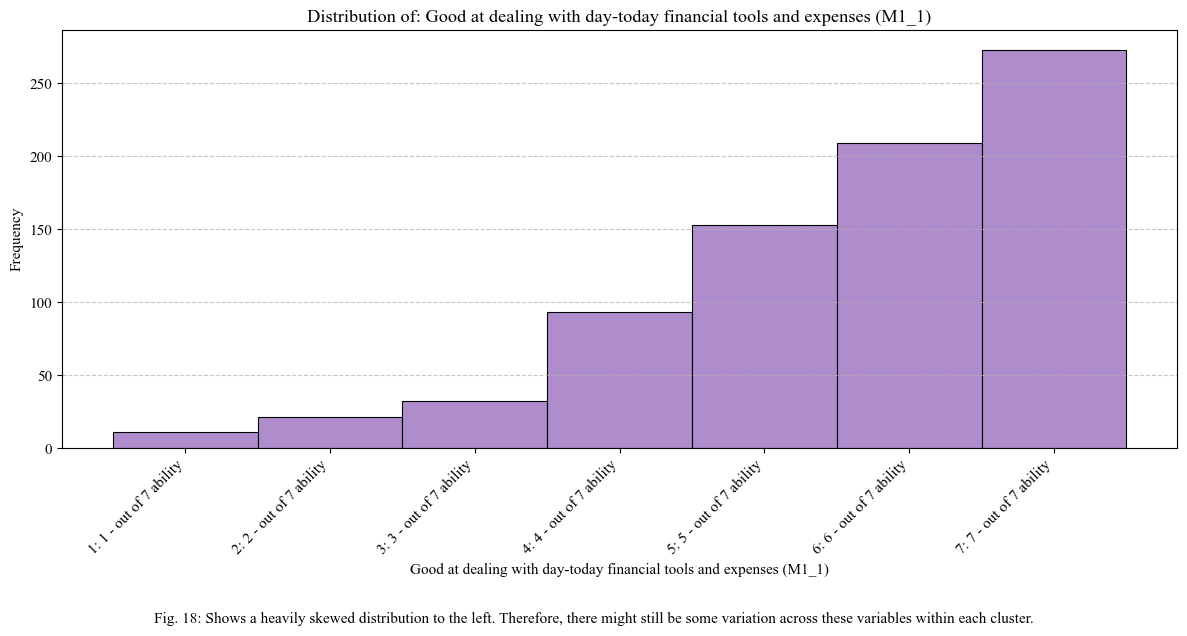

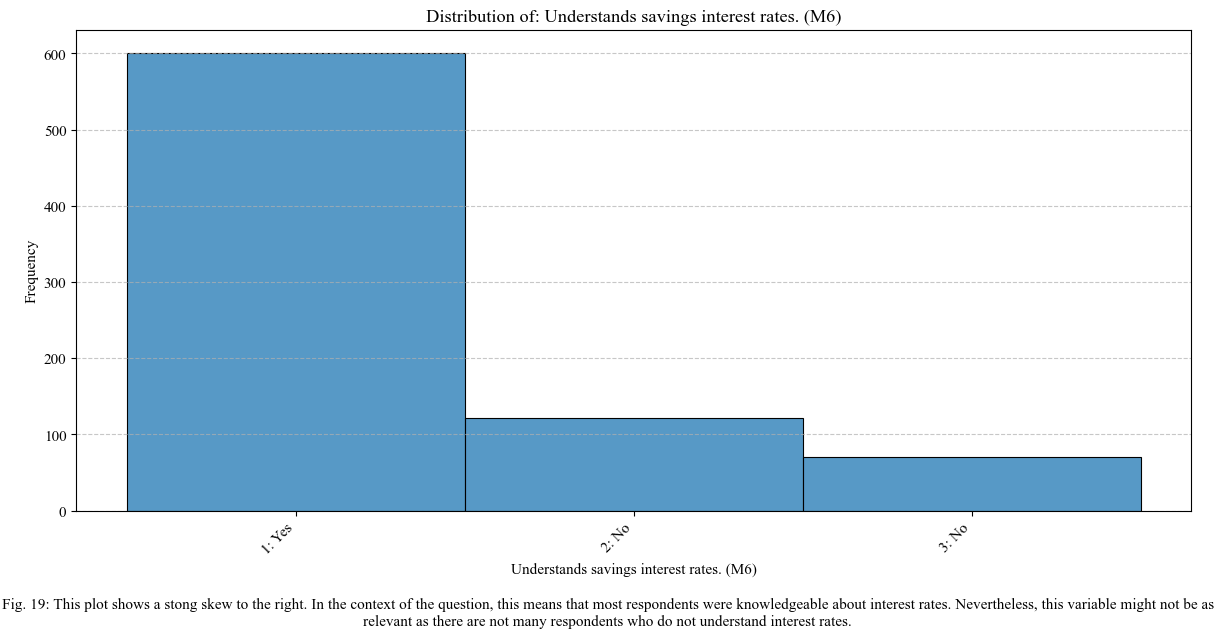

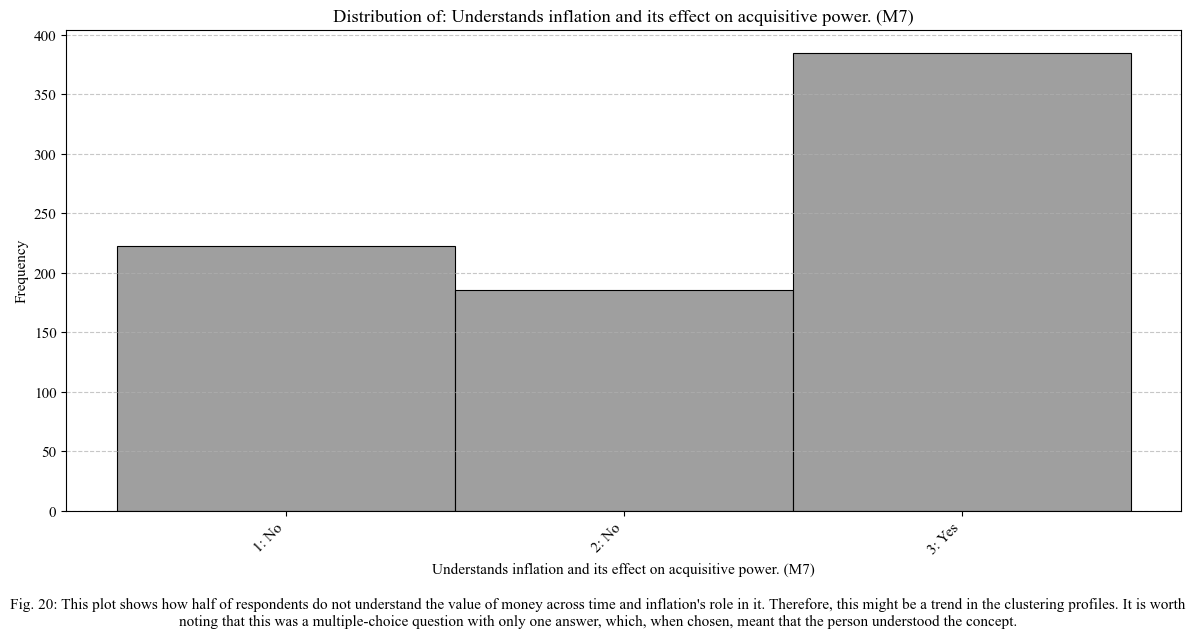

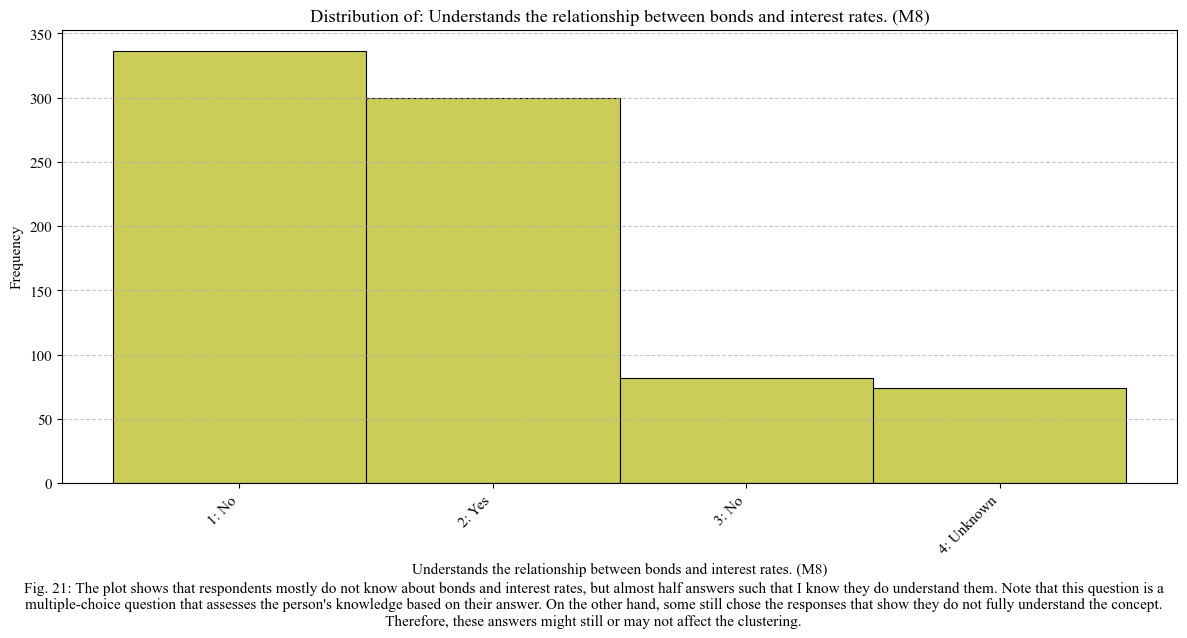

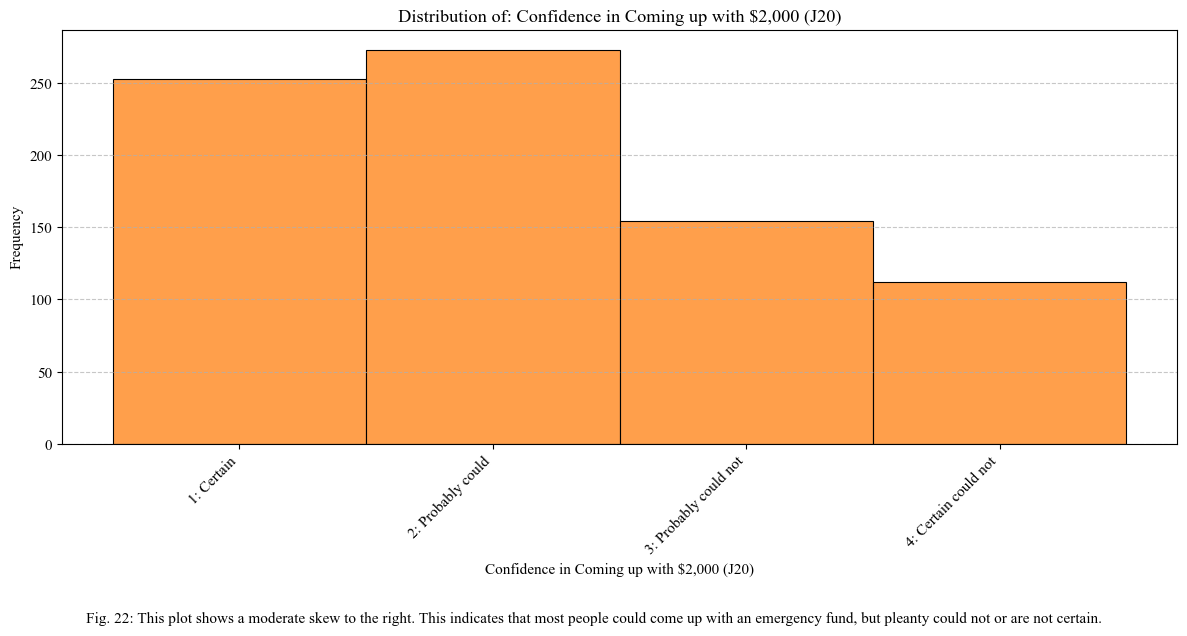

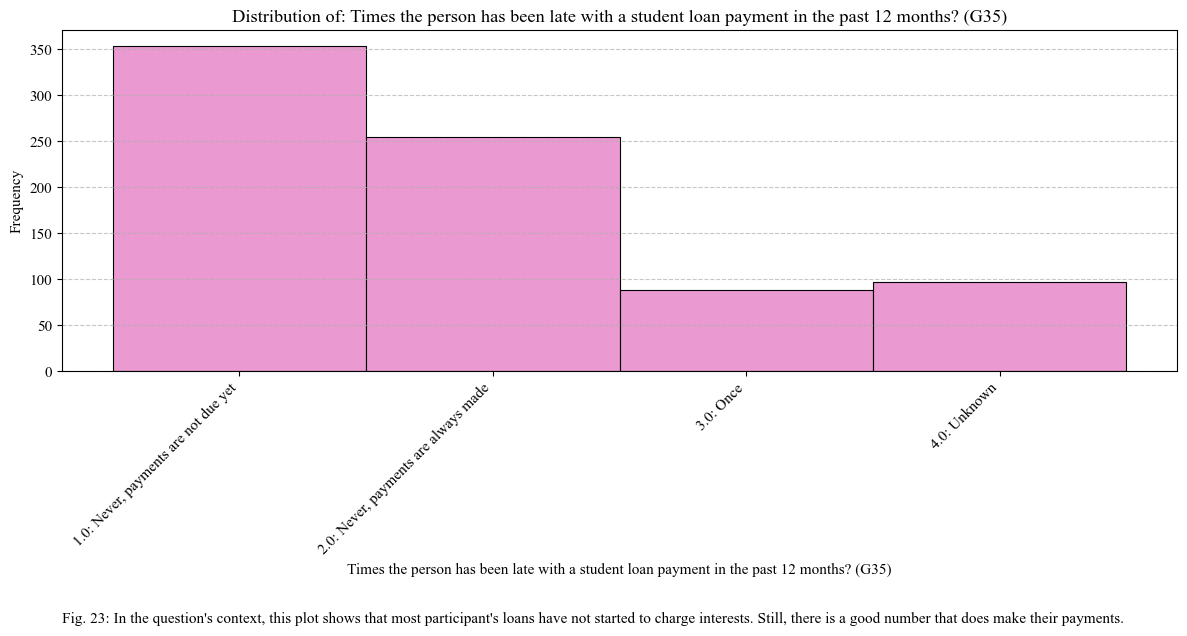

All plots have been saved in the directory: clean_questionnaire_plots


In [137]:
generate_questionnaire_plots(data, questionnaire_mapping, question_descriptions, output_dir="clean_questionnaire_plots")

In [138]:
data.drop(columns=["A50B","A50A"], inplace=True, errors="ignore")  # Dropping "A50B" before PCA

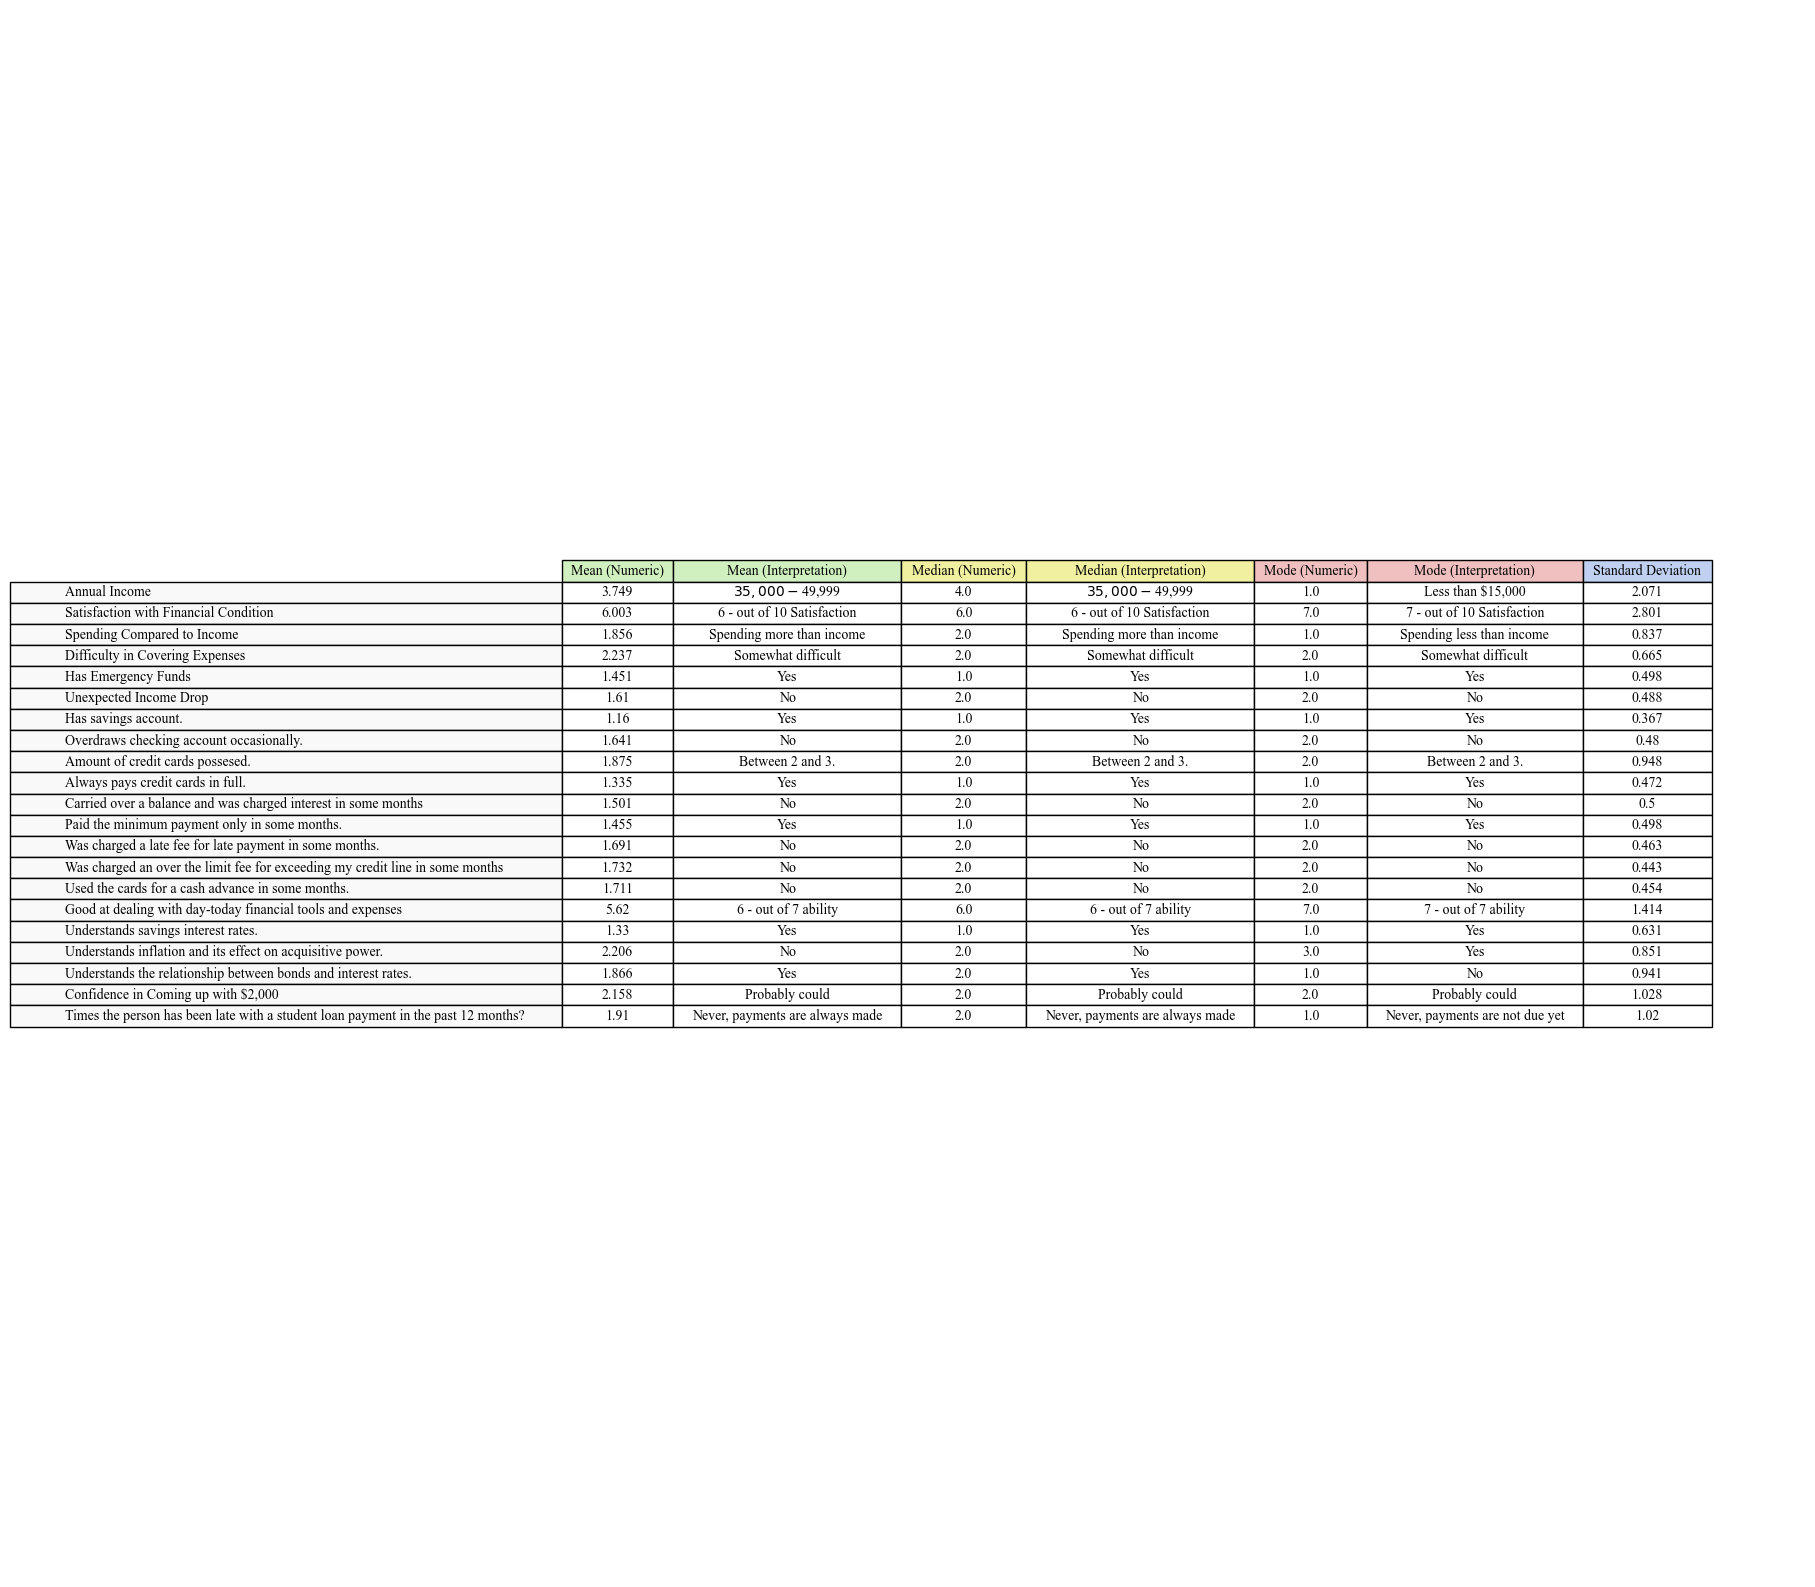

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_descriptive_table_with_interpretation(original_data, mapping):
    """
    Create a table summarizing the mean, median, mode, and standard deviation results 
    for each question in the dataset, including narrative interpretations.

    Parameters:
    - original_data: DataFrame with original, non-scaled data for calculating statistics.
    - mapping: Dictionary with question codes, descriptions, and answer mappings.

    Returns:
    - descriptive_table: A pandas DataFrame containing the mean, median, mode, 
      standard deviation results with interpretations.
    """
    descriptive_table = pd.DataFrame()

    # Loop through each column in the data
    for col in original_data.columns:
        if col in mapping:
            question_desc = mapping[col]["description"]
            possible_answers = mapping[col]["answers"]

            # Calculate mean, median, mode, and standard deviation
            mean_val = original_data[col].mean()
            median_val = original_data[col].median()
            mode_val = original_data[col].mode()[0] if not original_data[col].mode().empty else np.nan
            std_dev = original_data[col].std()

            # Interpret mean, median, and mode values
            mean_answer = (
                min(possible_answers.keys(), key=lambda x: abs(x - mean_val))
                if not np.isnan(mean_val)
                else "Unknown"
            )
            median_answer = (
                min(possible_answers.keys(), key=lambda x: abs(x - median_val))
                if not np.isnan(median_val)
                else "Unknown"
            )
            mode_answer = possible_answers.get(mode_val, "Unknown")

            # Add to the table
            descriptive_table.loc[question_desc, "Mean (Numeric)"] = round(mean_val, 3) if not np.isnan(mean_val) else "N/A"
            descriptive_table.loc[question_desc, "Mean (Interpretation)"] = possible_answers[mean_answer]
            descriptive_table.loc[question_desc, "Median (Numeric)"] = round(median_val, 3) if not np.isnan(median_val) else "N/A"
            descriptive_table.loc[question_desc, "Median (Interpretation)"] = possible_answers[median_answer]
            descriptive_table.loc[question_desc, "Mode (Numeric)"] = mode_val if mode_val != np.nan else "N/A"
            descriptive_table.loc[question_desc, "Mode (Interpretation)"] = mode_answer
            descriptive_table.loc[question_desc, "Standard Deviation"] = round(std_dev, 3) if not np.isnan(std_dev) else "N/A"

    return descriptive_table


# Generate the descriptive table
descriptive_table = create_descriptive_table_with_interpretation(data, questionnaire_mapping)

# Plot the improved table with mean, median, mode, and standard deviation
fig, ax = plt.subplots(figsize=(18, 16))
ax.axis('off')
table = ax.table(
    cellText=descriptive_table.values,
    rowLabels=descriptive_table.index,
    colLabels=descriptive_table.columns,
    cellLoc='center',
    loc='center',
    colColours=["#d0f0c0", "#d0f0c0", "#f0f0a0", "#f0f0a0", "#f0c0c0", "#f0c0c0", "#c0d0f0"],  # Green: Mean, Yellow: Median, Red: Mode, Blue: Std Dev
    rowColours=["#f9f9f9"] * len(descriptive_table),
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(descriptive_table.columns))))

# Title for the table
plt.tight_layout()
plt.show()

## Clustering

We make a PCA on the data to look for obvious clusters.

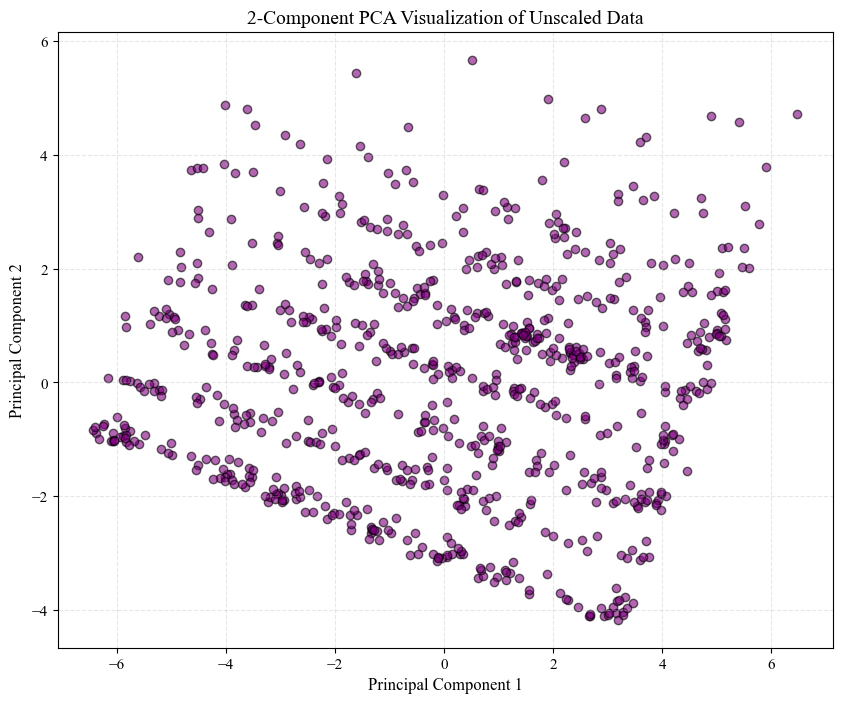

In [140]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA with 2 components to the unscaled data
pca_unscaled = PCA(n_components=2)
X_pca_unscaled = pca_unscaled.fit_transform(data)

# Create a DataFrame for the reduced data
pca_unscaled_df = pd.DataFrame(X_pca_unscaled, columns=["PC1", "PC2"])

# Plot the 2D PCA results for the unscaled data
plt.figure(figsize=(10, 8))
plt.scatter(pca_unscaled_df["PC1"], pca_unscaled_df["PC2"], alpha=0.6, edgecolor='k', color='purple')
plt.title("2-Component PCA Visualization of Unscaled Data", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.show()

#We don't need these columns in the df.
data.drop(columns=["PC1", "PC2"], inplace=True, errors="ignore")

**We scale the data to aid model convergence and fairness when clustering based on distances.**

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

**Model performance comparison.**

K-means clustering

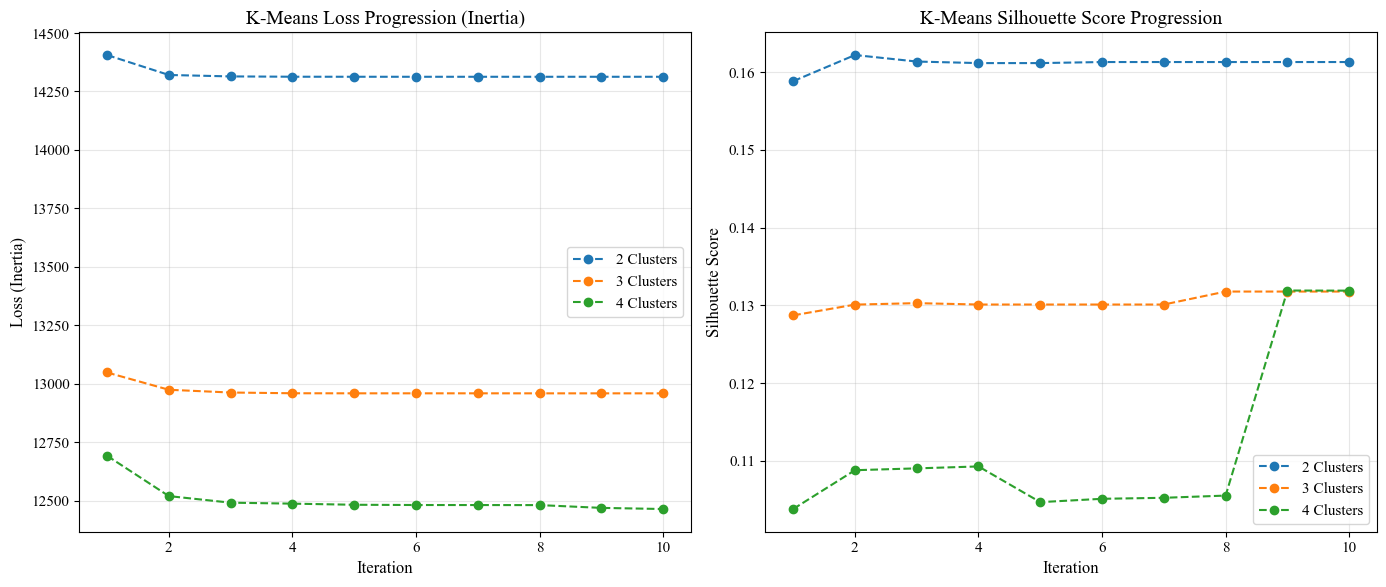

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the range of clusters to test
cluster_range = range(2, 5)  # Test for clusters 2, 3, and 4
iterations = 10  # Number of iterations to run for each cluster count

# Containers for results
kmeans_results = {"labels": {}, "loss": {}, "silhouette": {}, "progression": {"loss": {}, "silhouette": {}}}

# Loop over the number of clusters
for n_clusters in cluster_range:
    losses = []
    silhouette_scores = []

    # Run multiple iterations for each number of clusters
    for i in range(1, iterations + 1):
        kmeans = KMeans(
            n_clusters=n_clusters,
            init="k-means++",
            max_iter=i,  # Incremental iterations
            random_state=42,
            n_init=10
        )
        kmeans.fit(X_scaled)
        labels = kmeans.labels_

        # Record loss (inertia)
        inertia = kmeans.inertia_
        losses.append(inertia)

        # Calculate silhouette score if valid
        if len(np.unique(labels)) > 1:
            silhouette_avg = silhouette_score(X_scaled, labels)
        else:
            silhouette_avg = np.nan
        silhouette_scores.append(silhouette_avg)

    # Store results for the current number of clusters
    kmeans_results["labels"][n_clusters] = labels
    kmeans_results["loss"][n_clusters] = losses[-1]  # Final loss
    kmeans_results["silhouette"][n_clusters] = silhouette_scores[-1]  # Final silhouette
    kmeans_results["progression"]["loss"][n_clusters] = losses
    kmeans_results["progression"]["silhouette"][n_clusters] = silhouette_scores

# Plot the progression of loss and silhouette scores
plt.figure(figsize=(14, 6))

# Loss progression plot
plt.subplot(1, 2, 1)
for n_clusters, losses in kmeans_results["progression"]["loss"].items():
    plt.plot(range(1, len(losses) + 1), losses, marker="o", linestyle="--", label=f"{n_clusters} Clusters")
plt.title("K-Means Loss Progression (Inertia)", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Loss (Inertia)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Silhouette score progression plot
plt.subplot(1, 2, 2)
for n_clusters, silhouette_scores in kmeans_results["progression"]["silhouette"].items():
    plt.plot(range(1, len(silhouette_scores) + 1), silhouette_scores, marker="o", linestyle="--", label=f"{n_clusters} Clusters")
plt.title("K-Means Silhouette Score Progression", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

GMM Clustering

/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/sit

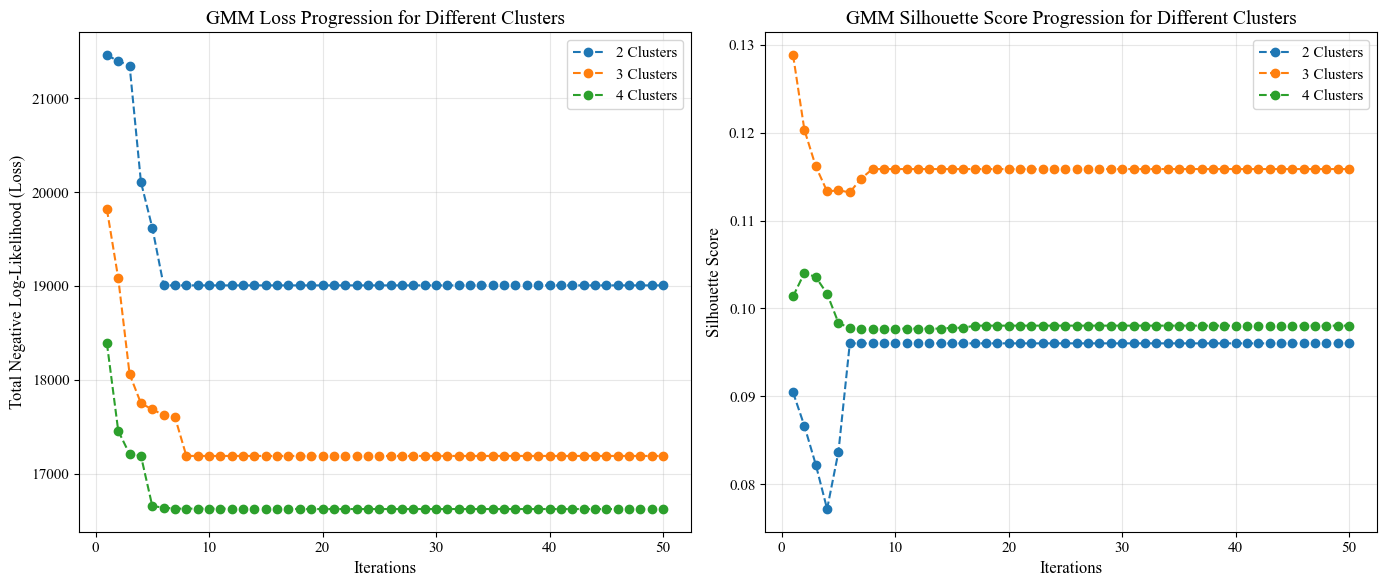

In [143]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range of clusters and iterations
cluster_range = range(2, 5)  # Test for clusters 2, 3, and 4
max_iters = 50  # Maximum iterations for fitting

# Containers for results
gmm_results = {"labels": {}, "loss": {}, "silhouette": {}, "progression": {"loss": {}, "silhouette": {}}}

# Loop over the number of clusters
for n_clusters in cluster_range:
    gmm_losses = []
    gmm_silhouette_scores = []

    # Initialize GMM with warm start enabled
    gmm = GaussianMixture(
        n_components=n_clusters,
        tol=1e-3,
        random_state=42,
        reg_covar=1e-3,
        init_params="kmeans",
        warm_start=True,  # Enable warm start for continuous training
    )

    # Run GMM for each iteration
    for i in range(1, max_iters + 1):
        try:
            # Set the max iterations for each incremental training step
            gmm.set_params(max_iter=i)
            gmm.fit(X_scaled)

            # Log the negative log-likelihood (loss)
            log_likelihood = gmm.score(X_scaled)  # Average log-likelihood
            gmm_losses.append(-log_likelihood * X_scaled.shape[0])  # Convert to total loss

            # Predict labels and calculate silhouette score
            gmm_labels = gmm.predict(X_scaled)
            if len(np.unique(gmm_labels)) > 1:  # Ensure at least 2 clusters
                silhouette_avg = silhouette_score(X_scaled, gmm_labels)
                gmm_silhouette_scores.append(silhouette_avg)
            else:
                gmm_silhouette_scores.append(0)

        except Exception as e:
            print(f"Iteration {i} encountered an error for {n_clusters} clusters: {e}")
            break

    # Store results for the current number of clusters
    gmm_results["labels"][n_clusters] = gmm_labels
    gmm_results["loss"][n_clusters] = gmm_losses[-1] if gmm_losses else None  # Final loss
    gmm_results["silhouette"][n_clusters] = gmm_silhouette_scores[-1] if gmm_silhouette_scores else None  # Final silhouette
    gmm_results["progression"]["loss"][n_clusters] = gmm_losses
    gmm_results["progression"]["silhouette"][n_clusters] = gmm_silhouette_scores

# Plot GMM results
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
for n_clusters, losses in gmm_results["progression"]["loss"].items():
    plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='--', label=f"{n_clusters} Clusters")
plt.title("GMM Loss Progression for Different Clusters", fontsize=14)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Total Negative Log-Likelihood (Loss)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Silhouette score plot
plt.subplot(1, 2, 2)
for n_clusters, silhouette_scores in gmm_results["progression"]["silhouette"].items():
    plt.plot(range(1, len(silhouette_scores) + 1), silhouette_scores, marker='o', linestyle='--', label=f"{n_clusters} Clusters")
plt.title("GMM Silhouette Score Progression for Different Clusters", fontsize=14)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Agglomerative clustering

/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


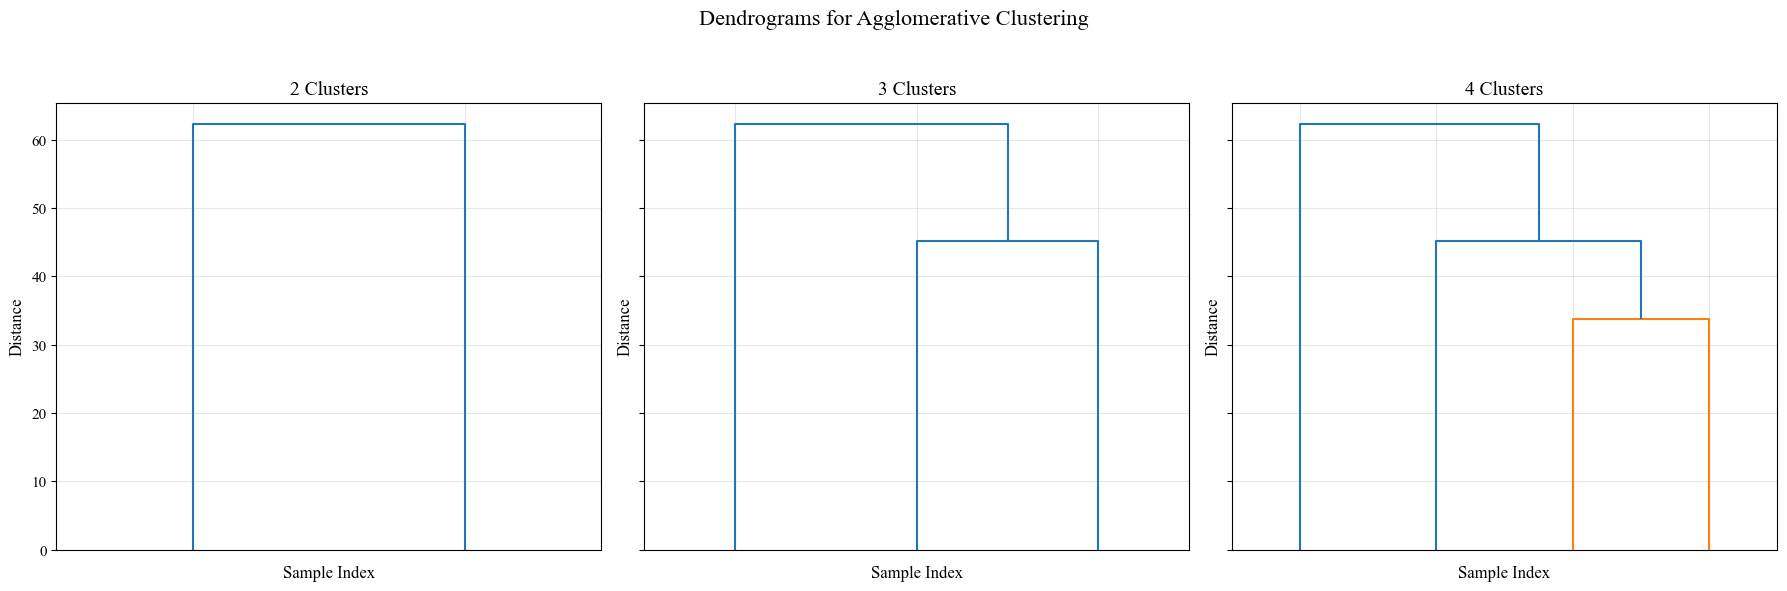

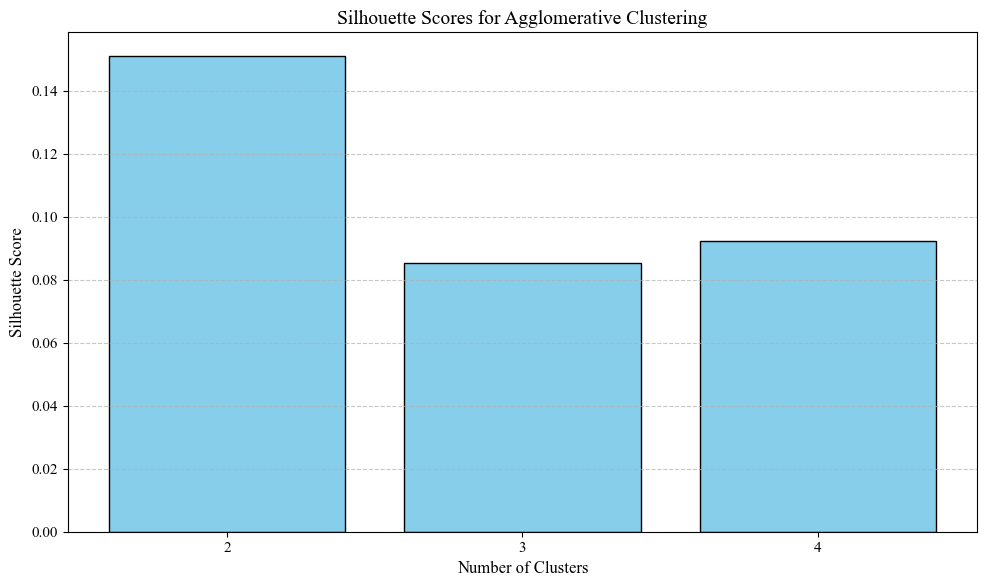

In [144]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the model
distance_metric = "euclidean"  # Distance metric to use
linkage_criteria = "ward"  # Linkage criteria (ward, complete, average, etc.)
cluster_range = range(2, 5)  # Number of clusters to test (2 to 4)

# Containers for results
agg_results = {"labels": {}, "silhouette": {}, "dendrograms": {}}

# Compute linkage matrix for dendrograms
Z = linkage(X_scaled, method=linkage_criteria, metric=distance_metric)

# Loop through different cluster numbers
silhouette_scores = []
for n_clusters in cluster_range:
    # Perform Agglomerative Clustering
    agg_model = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance_metric, linkage=linkage_criteria)
    agg_labels = agg_model.fit_predict(X_scaled)
    
    # Calculate silhouette score
    if len(np.unique(agg_labels)) > 1:  # Ensure at least 2 clusters are formed
        silhouette_avg = silhouette_score(X_scaled, agg_labels, metric=distance_metric)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_avg = np.nan
        silhouette_scores.append(silhouette_avg)
    
    # Store results for PCA visualization
    agg_results["labels"][n_clusters] = agg_labels
    agg_results["silhouette"][n_clusters] = silhouette_avg

# Generate side-by-side dendrograms
fig, axes = plt.subplots(1, len(cluster_range), figsize=(18, 6), sharey=True)

for ax, n_clusters in zip(axes, cluster_range):
    dendrogram(Z, truncate_mode="lastp", p=n_clusters, show_leaf_counts=False, ax=ax)
    ax.set_title(f"{n_clusters} Clusters", fontsize=14)
    ax.set_xlabel("Sample Index", fontsize=12)
    ax.set_ylabel("Distance", fontsize=12)
    ax.grid(alpha=0.3)

plt.suptitle("Dendrograms for Agglomerative Clustering", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot silhouette scores for different cluster numbers
plt.figure(figsize=(10, 6))
plt.bar(cluster_range, silhouette_scores, color="skyblue", edgecolor="black")
plt.title("Silhouette Scores for Agglomerative Clustering", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(list(cluster_range))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Results

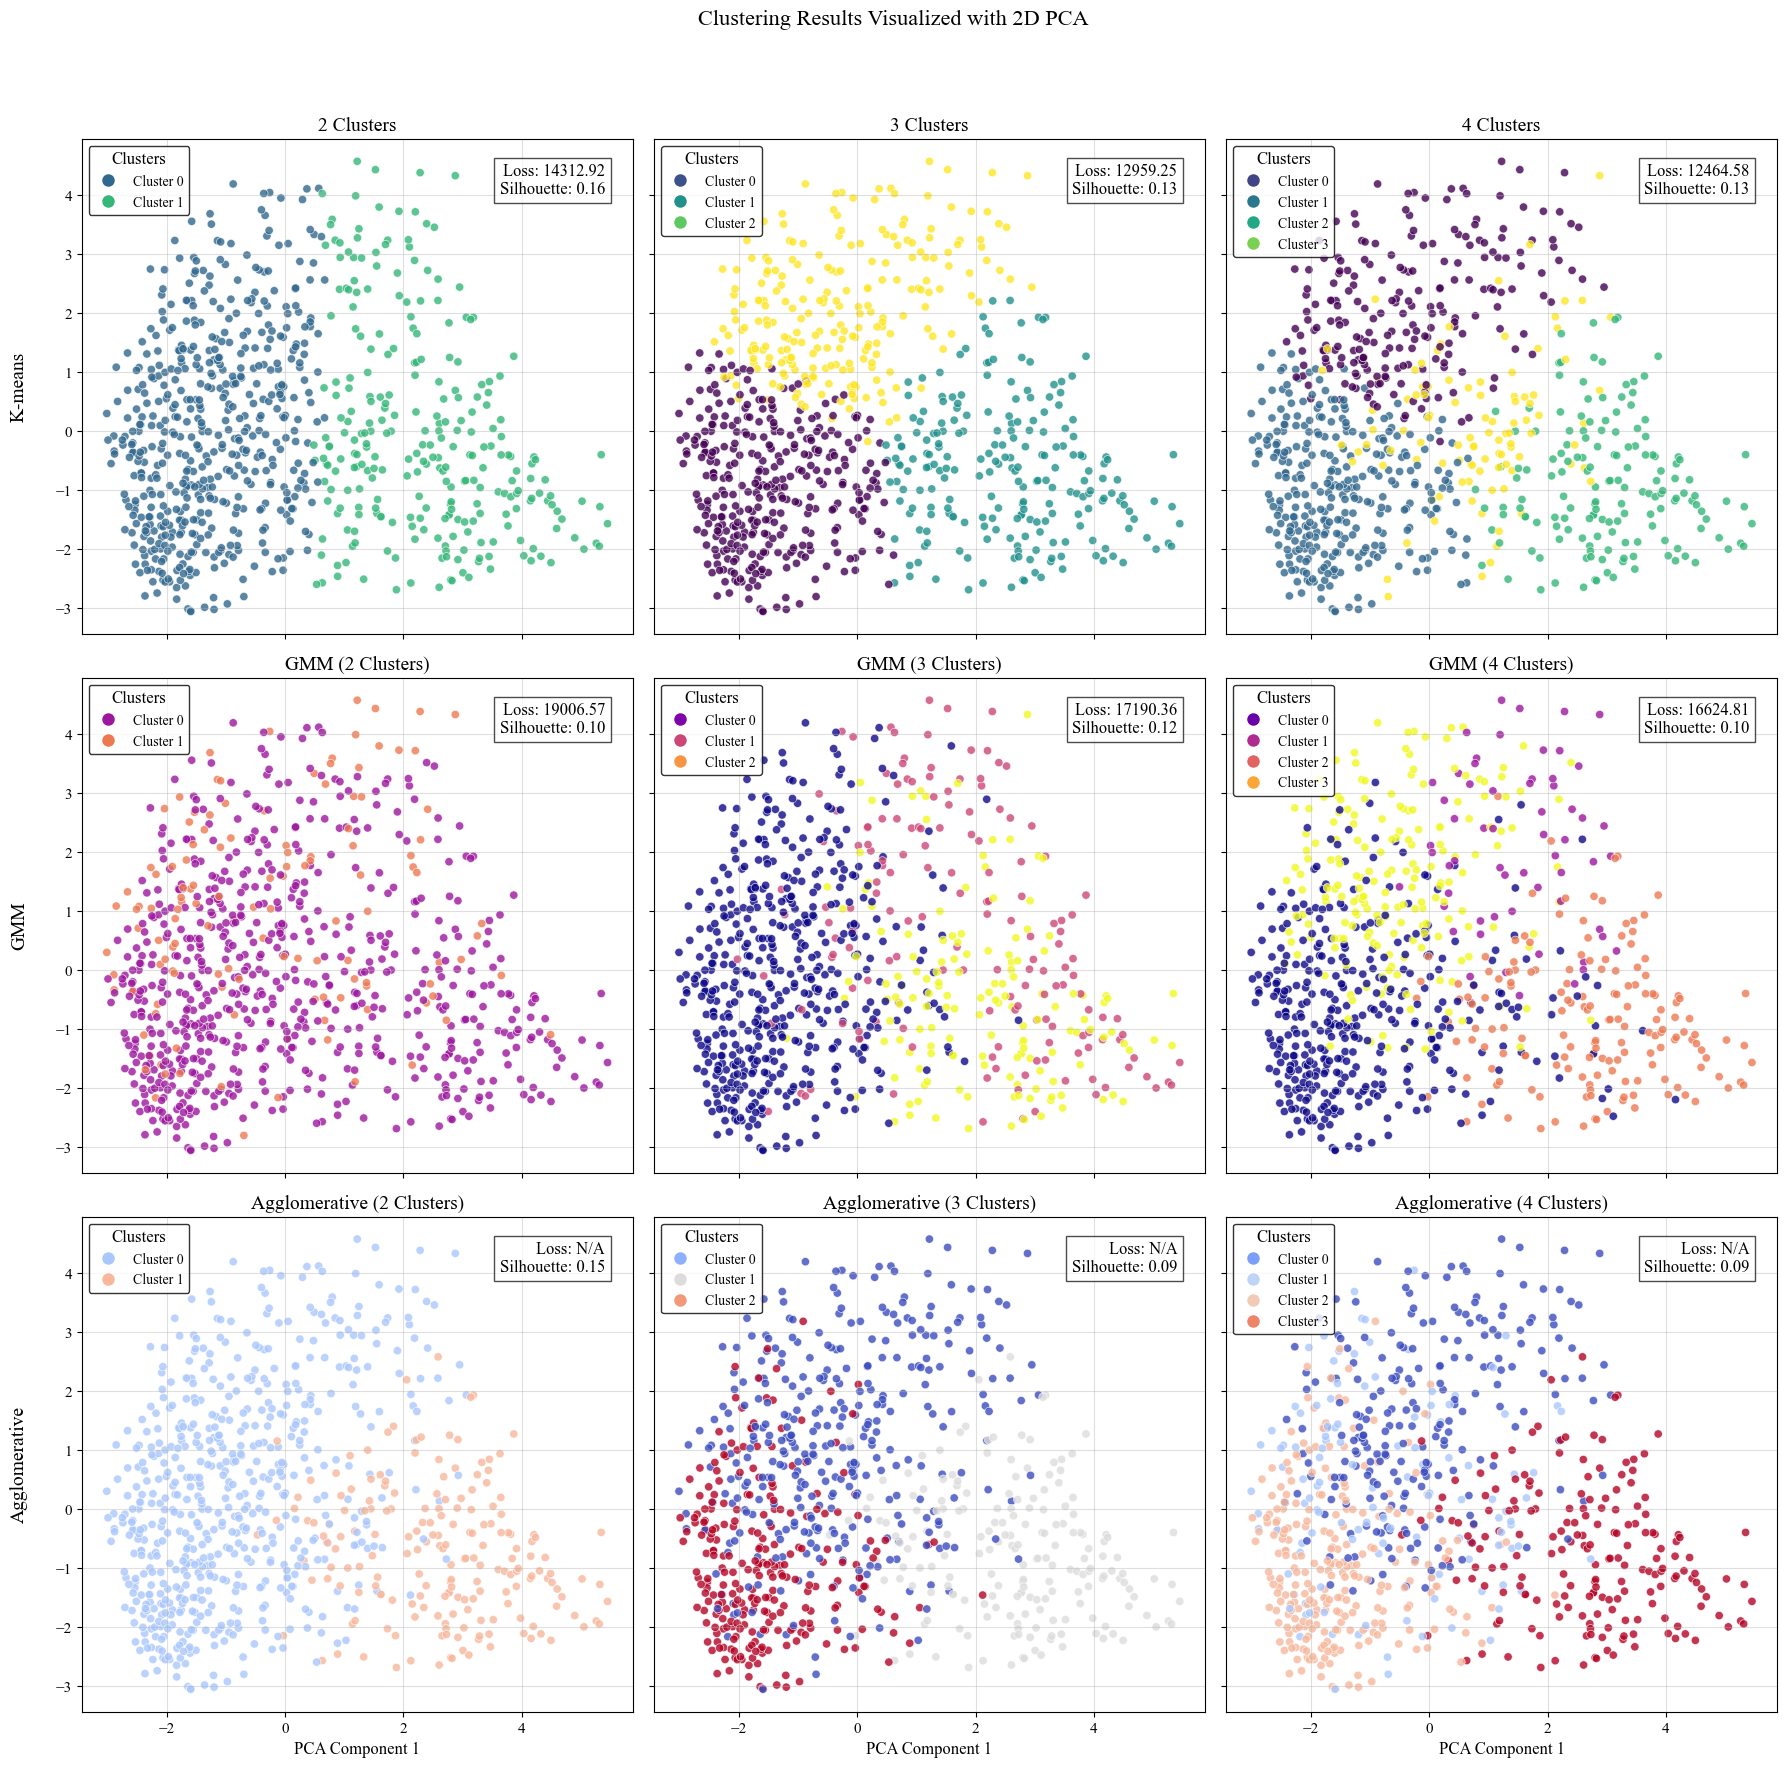

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA to reduce data to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Precomputed clustering results
all_cluster_results = {
    "K-means": kmeans_results,
    "GMM": gmm_results,
    "Agglomerative": agg_results,  # Use updated Agglomerative clustering results
}

# Define range of clusters
cluster_range = range(2, 5)  # Test for clusters 2, 3, and 4

# Create a figure to visualize all clustering results
fig, axes = plt.subplots(
    len(all_cluster_results),
    len(cluster_range),
    figsize=(18, 6 * len(all_cluster_results)),
    sharex=True,
    sharey=True,
)

# Plot settings
color_maps = {"K-means": "viridis", "GMM": "plasma", "Agglomerative": "coolwarm"}
row_titles = list(all_cluster_results.keys())
col_titles = [f"{n_clusters} Clusters" for n_clusters in cluster_range]

# Loop through each model and number of clusters
for row_idx, (model_name, results) in enumerate(all_cluster_results.items()):
    for col_idx, n_clusters in enumerate(cluster_range):
        ax = axes[row_idx, col_idx] if len(all_cluster_results) > 1 else axes[col_idx]
        labels = results["labels"][n_clusters]
        silhouette = results["silhouette"].get(n_clusters, None)
        loss = results["loss"].get(n_clusters, None) if "loss" in results else None

        # Create scatterplot
        scatter = sns.scatterplot(
            x=X_pca_2d[:, 0],
            y=X_pca_2d[:, 1],
            hue=labels,
            palette=color_maps[model_name],
            ax=ax,
            legend=False,
            alpha=0.8,
        )
        ax.set_title(f"{model_name} ({n_clusters} Clusters)", fontsize=14)
        ax.set_xlabel("PCA Component 1", fontsize=12)
        ax.set_ylabel("PCA Component 2", fontsize=12)
        ax.grid(alpha=0.4)

        # Annotate the plot with silhouette score and loss in the top-right corner
        loss_text = f"Loss: {loss:.2f}" if loss is not None else "Loss: N/A"
        silhouette_text = f"Silhouette: {silhouette:.2f}" if silhouette is not None else "Silhouette: N/A"
        ax.text(
            0.95,
            0.95,
            f"{loss_text}\n{silhouette_text}",
            transform=ax.transAxes,
            fontsize=12,
            verticalalignment="top",
            horizontalalignment="right",
            color="black",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"),
        )

        # Add legend with cluster labels, color-coded
        unique_labels = np.unique(labels)
        cluster_labels = [f"Cluster {label}" for label in unique_labels]
        scatter_palette = sns.color_palette(color_maps[model_name], len(unique_labels))
        legend_handles = [
            plt.Line2D([0], [0], marker='o', color="w", markerfacecolor=scatter_palette[i], markersize=10)
            for i, label in enumerate(unique_labels)
        ]
        legend = ax.legend(
            handles=legend_handles,
            labels=cluster_labels,
            loc="upper left",
            fontsize=10,
            title="Clusters",
            title_fontsize=12,
            frameon=True,
            facecolor="white",
            edgecolor="black",
        )
        for text in legend.get_texts():
            text.set_color("black")

# Add row titles
for ax, row_title in zip(axes[:, 0] if len(all_cluster_results) > 1 else [axes[0]], row_titles):
    ax.set_ylabel(row_title, fontsize=14, labelpad=20)

# Add column titles
for ax, col_title in zip(axes[0, :] if len(all_cluster_results) > 1 else [axes], col_titles):
    ax.set_title(col_title, fontsize=14)

# Adjust layout
plt.suptitle("Clustering Results Visualized with 2D PCA", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/bruno_alv/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


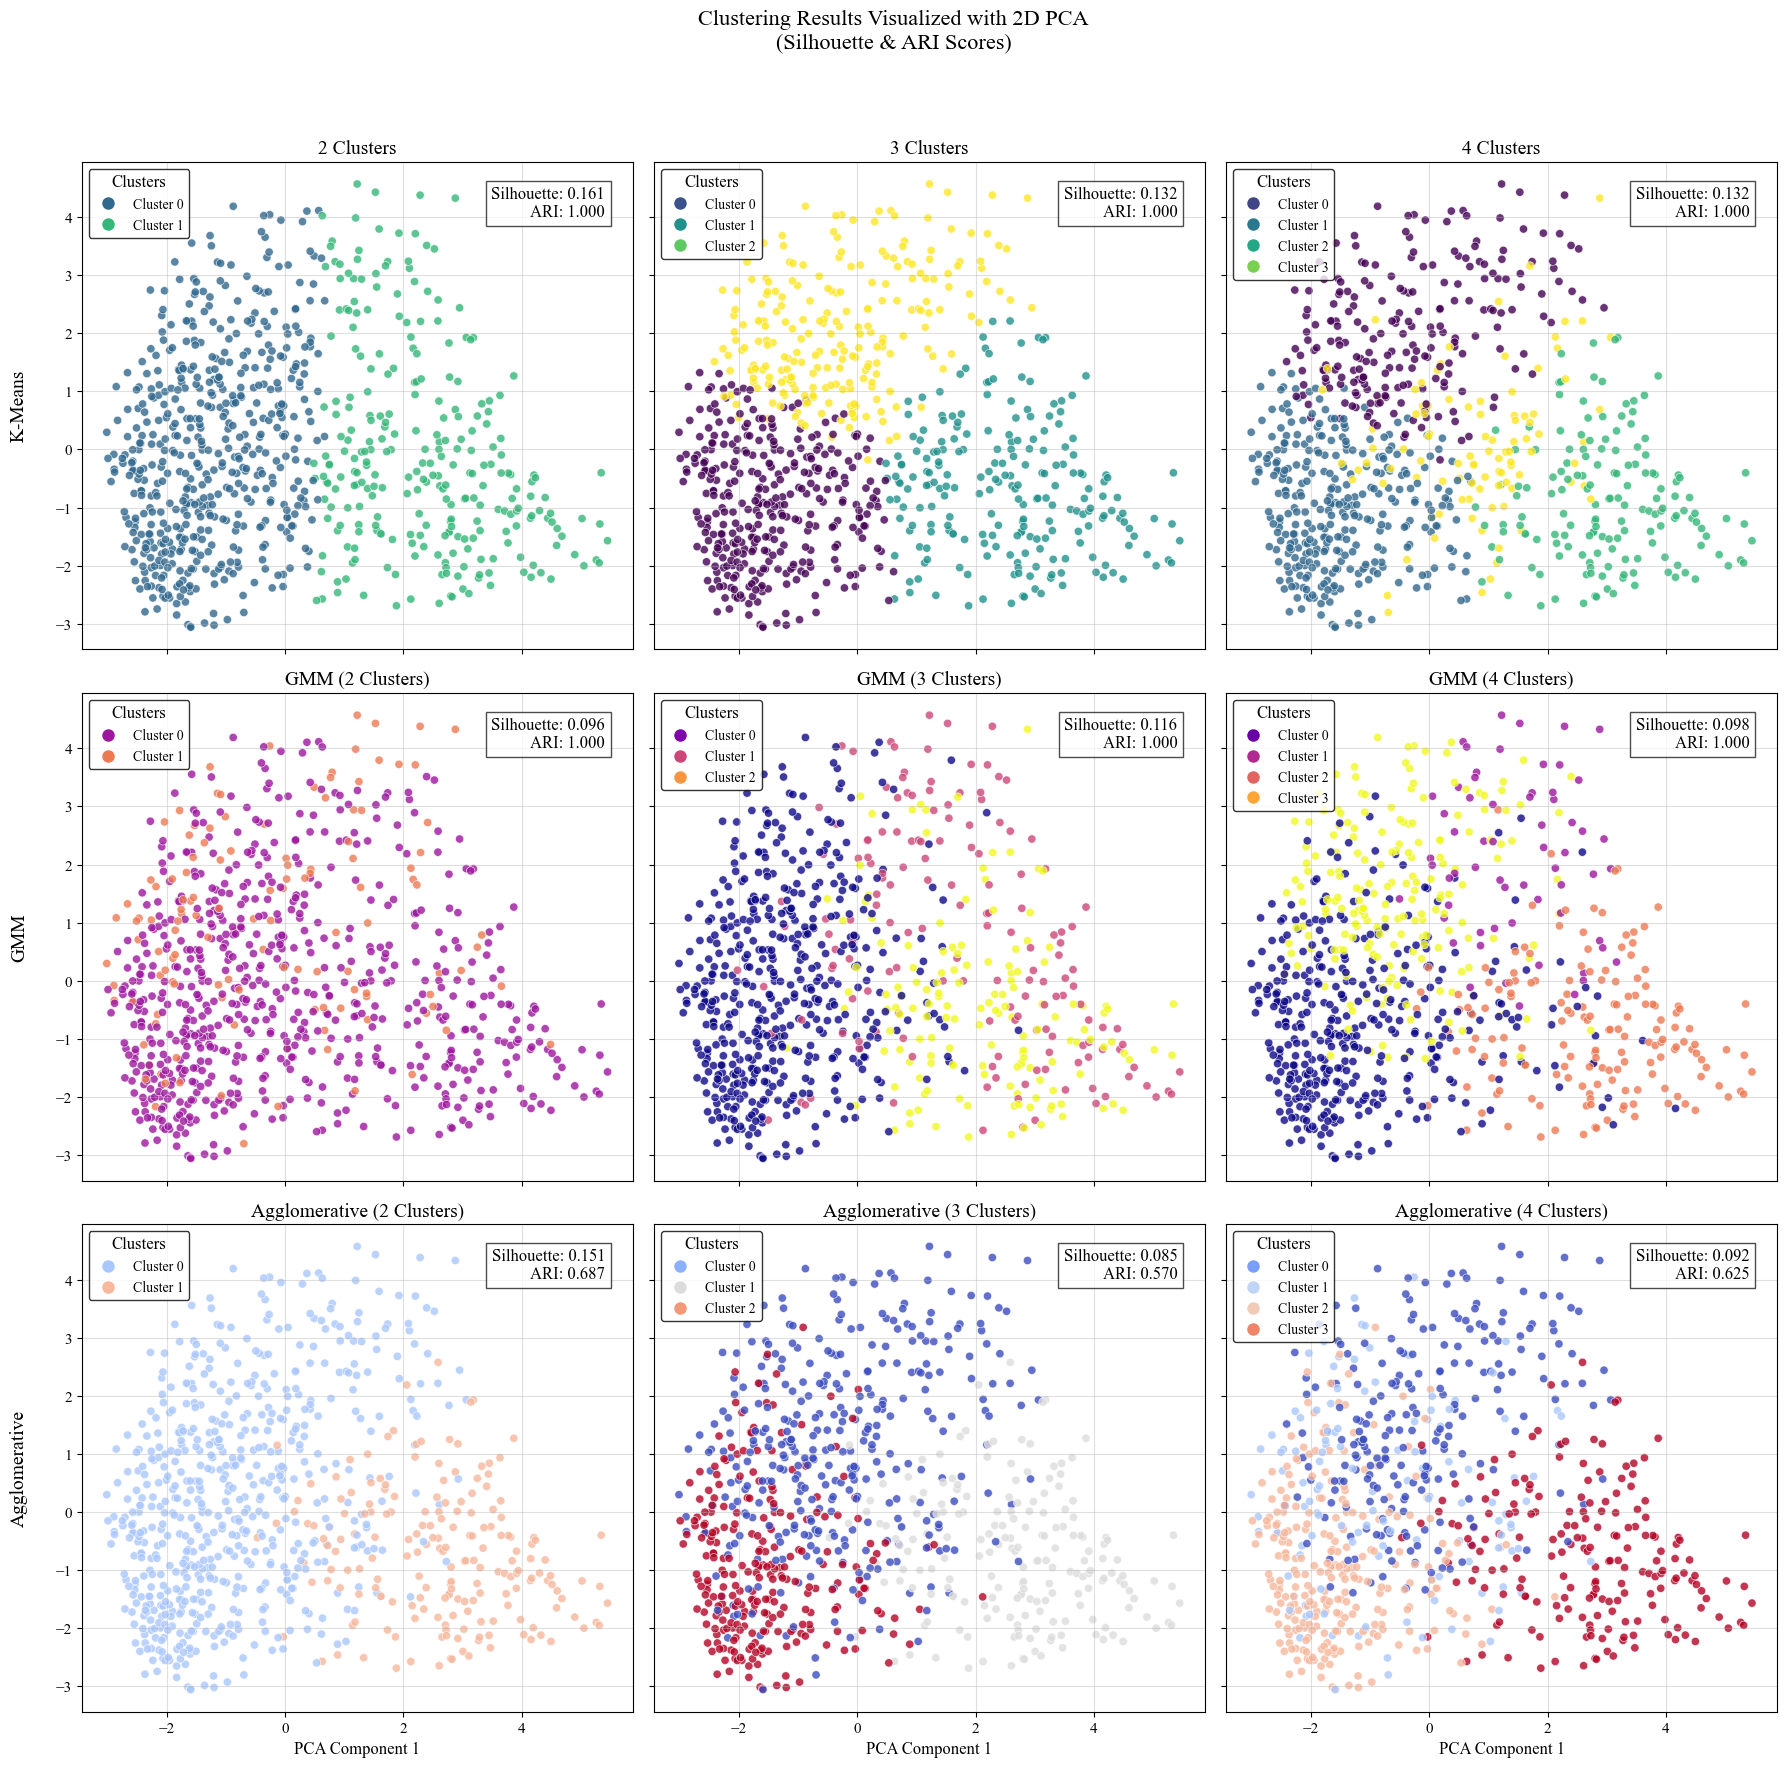

In [146]:
# Re-import necessary libraries after execution state reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

# Define the number of clusters to test
cluster_range = range(2, 5)

# Split the dataset into training and testing sets (100% training for clustering, duplicated for testing)
train_data, test_data = X_scaled.copy(), X_scaled.copy()

# Containers for storing results
clustering_results = {n_clusters: {} for n_clusters in cluster_range}

# Function to assign cluster labels for test data based on trained models
def assign_labels(model, train_X, test_X, method):
    """
    Assign cluster labels to test data based on the trained clustering model.

    Parameters:
    - model: Trained clustering model
    - train_X: Training dataset (used to train the model)
    - test_X: Test dataset (to assign labels)
    - method: Clustering method ("K-Means", "GMM", "Agglomerative")

    Returns:
    - Assigned cluster labels for the test dataset
    """
    if method == "K-Means":
        centroids = model.cluster_centers_
        distances = cdist(test_X, centroids, 'euclidean')
        return np.argmin(distances, axis=1)
    
    elif method == "GMM":
        return model.predict(test_X)

    elif method == "Agglomerative":
        cluster_means = np.array([train_X[model.labels_ == i].mean(axis=0) for i in range(model.n_clusters)])
        distances = cdist(test_X, cluster_means, 'euclidean')
        return np.argmin(distances, axis=1)

# Apply clustering to the training dataset and assign labels to the test dataset
for n_clusters in cluster_range:
    train_X = train_data
    test_X = test_data

    # --- K-Means ---
    kmeans = KMeans(
            n_clusters=n_clusters,
            init="k-means++",
            max_iter=i,  # Incremental iterations
            random_state=42,
            n_init=10
        )
    train_labels_kmeans = kmeans.fit_predict(train_X)
    test_labels_kmeans = assign_labels(kmeans, train_X, test_X, "K-Means")

    # --- Gaussian Mixture Model (GMM) ---
    # Initialize GMM with warm start enabled
    gmm = GaussianMixture(
        n_components=n_clusters,
        tol=1e-3,
        random_state=42,
        reg_covar=1e-3,
        init_params="kmeans",
        warm_start=True,  # Enable warm start for continuous training
    )

    train_labels_gmm = gmm.fit_predict(train_X)
    test_labels_gmm = assign_labels(gmm, train_X, test_X, "GMM")

    # --- Agglomerative Clustering ---
    agg = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance_metric, linkage=linkage_criteria)
    train_labels_agg = agg.fit_predict(train_X)
    test_labels_agg = assign_labels(agg, train_X, test_X, "Agglomerative")

    # Compute silhouette scores and ARI scores
    clustering_results[n_clusters]["K-Means"] = {
        "silhouette": silhouette_score(train_X, train_labels_kmeans),
        "ARI": adjusted_rand_score(train_labels_kmeans, test_labels_kmeans),
        "labels": train_labels_kmeans,
    }
    clustering_results[n_clusters]["GMM"] = {
        "silhouette": silhouette_score(train_X, train_labels_gmm),
        "ARI": adjusted_rand_score(train_labels_gmm, test_labels_gmm),
        "labels": train_labels_gmm,
    }
    clustering_results[n_clusters]["Agglomerative"] = {
        "silhouette": silhouette_score(train_X, train_labels_agg),
        "ARI": adjusted_rand_score(train_labels_agg, test_labels_agg),
        "labels": train_labels_agg,
    }

# Perform PCA for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(train_X)

# Visualization settings
fig, axes = plt.subplots(len(clustering_results[2]), len(cluster_range), figsize=(18, 6 * len(clustering_results[2])), sharex=True, sharey=True)
color_maps = {"K-Means": "viridis", "GMM": "plasma", "Agglomerative": "coolwarm"}
row_titles = list(clustering_results[2].keys())
col_titles = [f"{n_clusters} Clusters" for n_clusters in cluster_range]

# Loop through each model and number of clusters
for row_idx, model_name in enumerate(row_titles):
    for col_idx, n_clusters in enumerate(cluster_range):
        ax = axes[row_idx, col_idx] if len(row_titles) > 1 else axes[col_idx]
        labels = clustering_results[n_clusters][model_name]["labels"]
        silhouette = clustering_results[n_clusters][model_name]["silhouette"]
        ari = clustering_results[n_clusters][model_name]["ARI"]

        # Create scatterplot
        scatter = sns.scatterplot(
            x=X_pca_2d[:, 0],
            y=X_pca_2d[:, 1],
            hue=labels,
            palette=color_maps[model_name],
            ax=ax,
            legend=False,
            alpha=0.8,
        )
        ax.set_title(f"{model_name} ({n_clusters} Clusters)", fontsize=14)
        ax.set_xlabel("PCA Component 1", fontsize=12)
        ax.set_ylabel("PCA Component 2", fontsize=12)
        ax.grid(alpha=0.4)

        # Annotate plot with silhouette score and ARI in the top-right corner
        ax.text(
            0.95,
            0.95,
            f"Silhouette: {silhouette:.3f}\nARI: {ari:.3f}",
            transform=ax.transAxes,
            fontsize=12,
            verticalalignment="top",
            horizontalalignment="right",
            color="black",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"),
        )

        # Add legend with cluster labels
        unique_labels = np.unique(labels)
        cluster_labels = [f"Cluster {label}" for label in unique_labels]
        scatter_palette = sns.color_palette(color_maps[model_name], len(unique_labels))
        legend_handles = [
            plt.Line2D([0], [0], marker='o', color="w", markerfacecolor=scatter_palette[i], markersize=10)
            for i, label in enumerate(unique_labels)
        ]
        legend = ax.legend(
            handles=legend_handles,
            labels=cluster_labels,
            loc="upper left",
            fontsize=10,
            title="Clusters",
            title_fontsize=12,
            frameon=True,
            facecolor="white",
            edgecolor="black",
        )
        for text in legend.get_texts():
            text.set_color("black")

# Add row and column titles
for ax, row_title in zip(axes[:, 0] if len(row_titles) > 1 else [axes[0]], row_titles):
    ax.set_ylabel(row_title, fontsize=14, labelpad=20)
for ax, col_title in zip(axes[0, :] if len(row_titles) > 1 else [axes], col_titles):
    ax.set_title(col_title, fontsize=14)

# Adjust layout
plt.suptitle("Clustering Results Visualized with 2D PCA\n(Silhouette & ARI Scores)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Cluster interpretation.**

In [149]:
# Function to create cluster mean table with interpretation based on the provided clustering results
def create_cluster_mean_table_with_interpretation(scaled_data, original_data, mapping, clustering_results, cluster_method, n_clusters):
    """
    Generalized function to interpret clustering results from different algorithms.
    This ensures that clustering results obtained from scaled data are mapped back 
    to the original dataset for meaningful interpretation.

    Parameters:
    - scaled_data: DataFrame of scaled values used for clustering.
    - original_data: DataFrame with original, non-scaled values for interpretation.
    - mapping: Dictionary with question codes, descriptions, and answer mappings.
    - clustering_results: Dictionary containing results from various clustering implementations.
    - cluster_method: The name of the clustering method used ("K-Means", "GMM", "Agglomerative").
    - n_clusters: Number of clusters to interpret.

    Returns:
    - cluster_means_df: DataFrame with mean results and interpretations for each cluster.
    """
    if n_clusters not in clustering_results or cluster_method not in clustering_results[n_clusters]:
        raise ValueError(f"Clustering results not found for {cluster_method} with {n_clusters} clusters.")

    cluster_data = clustering_results[n_clusters][cluster_method]
    if "labels" not in cluster_data:
        raise ValueError(f"Labels not found for {cluster_method} with {n_clusters} clusters.")

    labels = cluster_data["labels"]

    if len(labels) != len(original_data):
        raise ValueError("Mismatch between number of cluster labels and original dataset entries.")

    # Assign cluster labels
    original_data_copy = original_data.copy()
    original_data_copy["Cluster_Label"] = labels

    # Compute means per cluster
    cluster_means = original_data_copy.groupby("Cluster_Label").mean()

    # Construct interpretation DataFrame
    cluster_means_df = pd.DataFrame()
    for col in cluster_means.columns:
        if col in mapping:
            question_desc = mapping[col]["description"]
            possible_answers = mapping[col]["answers"]

            for cluster_id in cluster_means.index:
                mean_val = cluster_means.at[cluster_id, col]
                interpreted_answer = min(
                    possible_answers.keys(),
                    key=lambda x: abs(x - mean_val)
                )
                cluster_means_df.loc[question_desc, f"Cluster {cluster_id} (Numeric)"] = round(mean_val, 3)
                cluster_means_df.loc[question_desc, f"Cluster {cluster_id} (Interpretation)"] = possible_answers[interpreted_answer]

    # Drop temporary column
    original_data_copy.drop(columns=["Cluster_Label"], inplace=True)

    return cluster_means_df

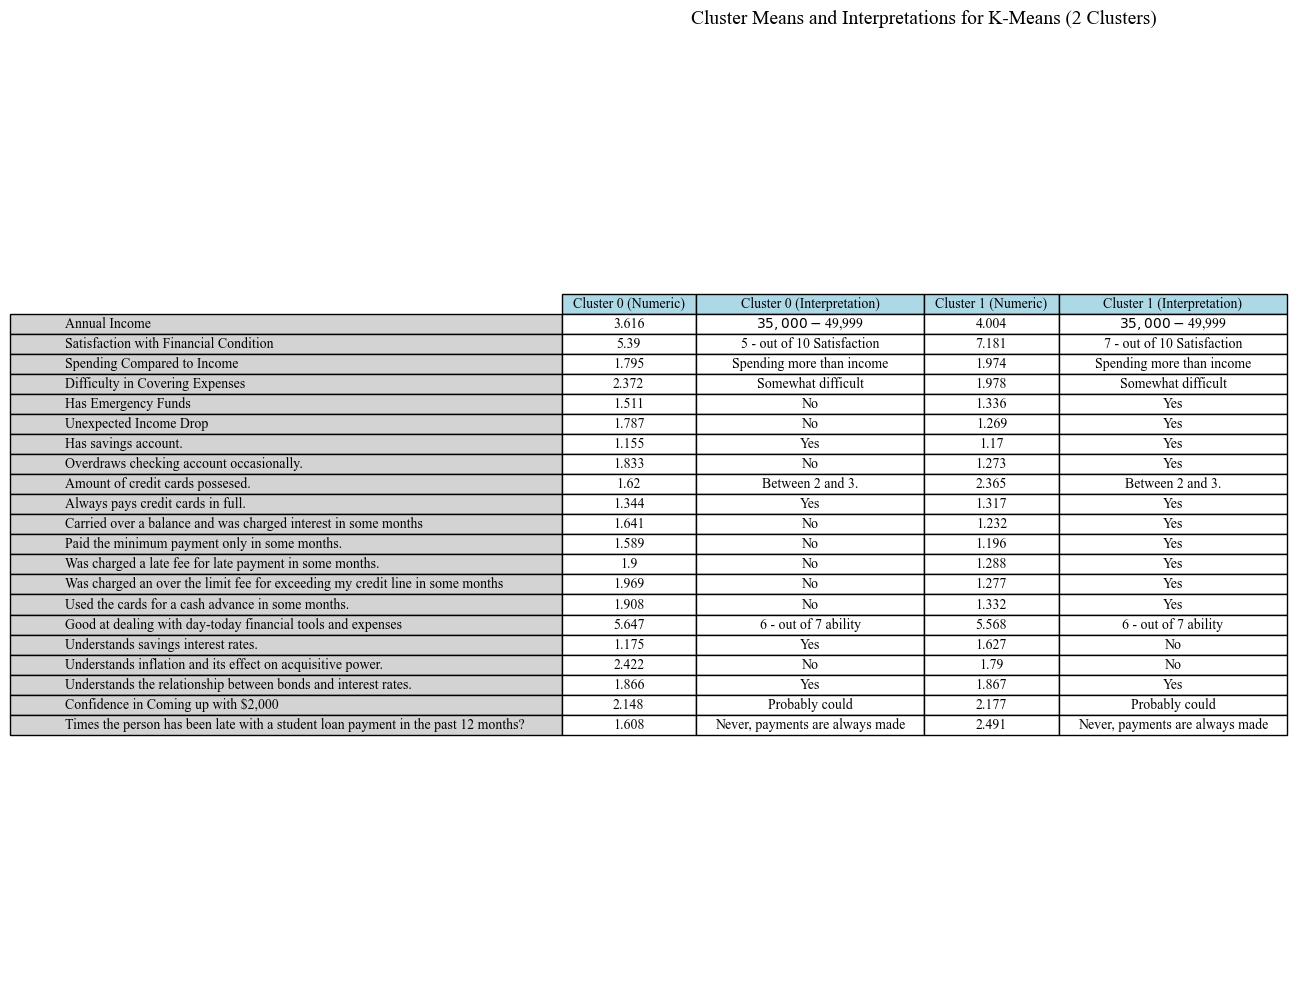

In [150]:
# Generate cluster mean table for K-Means (2 Clusters)
cluster_mean_table = create_cluster_mean_table_with_interpretation(
    scaled_data=X_scaled,
    original_data=data,
    mapping=questionnaire_mapping,
    clustering_results=clustering_results,
    cluster_method="K-Means",
    n_clusters=2,
)

# Display the formatted cluster mean table
fig, ax = plt.subplots(figsize=(12, 10))
ax.axis("off")

# Create the table
table = ax.table(
    cellText=cluster_mean_table.values,
    rowLabels=cluster_mean_table.index,
    colLabels=cluster_mean_table.columns,
    cellLoc="center",
    loc="center",
    colColours=["lightblue"] * len(cluster_mean_table.columns),
    rowColours=["lightgrey"] * len(cluster_mean_table.index),
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(cluster_mean_table.columns))))
ax.set_title("Cluster Means and Interpretations for K-Means (2 Clusters)", fontsize=14, fontweight="bold", pad=20)

plt.tight_layout()
plt.show()

**Best Feature exploration**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Function to apply clustering and compute silhouette scores
def apply_clustering(X, num_clusters=2):
    """
    Apply clustering algorithms and compute silhouette scores.
    Ensures that clustering results in at least 2 distinct labels before computing scores.

    Parameters:
    - X: DataFrame of selected features
    - num_clusters: Number of clusters to use

    Returns:
    - scores: Dictionary of silhouette scores for each clustering method
    """
    scores = {"K-Means": None, "GMM": None, "Agglomerative": None}

    if len(np.unique(X, axis=0)) < num_clusters:
        return scores  # Skip if not enough distinct points

    # --- K-Means ---
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)
    if len(set(kmeans_labels)) > 1:
        scores["K-Means"] = silhouette_score(X, kmeans_labels)

    # --- GMM ---
    gmm = GaussianMixture(n_components=num_clusters, random_state=42, reg_covar=1e-3, init_params="kmeans")
    gmm_labels = gmm.fit_predict(X)
    if len(set(gmm_labels)) > 1:
        scores["GMM"] = silhouette_score(X, gmm_labels)

    # --- Agglomerative Clustering ---
    agg = AgglomerativeClustering(n_clusters=num_clusters, metric="euclidean", linkage="ward")
    agg_labels = agg.fit_predict(X)
    if len(set(agg_labels)) > 1:
        scores["Agglomerative"] = silhouette_score(X, agg_labels)

    return scores

# Track silhouette scores and feature contributions
silhouette_progression = {"K-Means": [], "GMM": [], "Agglomerative": []}
feature_contributions = []

selected_features = []
remaining_features = list(data.columns)

# Initialize baseline silhouette scores with the first feature
baseline_scores = apply_clustering(data[remaining_features[:1]])

# Iteratively add one feature at a time
while remaining_features:
    best_feature = None
    best_scores = None
    best_improvement = -np.inf

    for feature in remaining_features:
        temp_features = selected_features + [feature]
        X_temp = data[temp_features]

        scores = apply_clustering(X_temp)

        # Compute improvements
        improvements = {method: scores[method] - baseline_scores[method] if scores[method] is not None else -np.inf for method in scores}

        avg_improvement = np.mean([val for val in improvements.values() if val != -np.inf])
        if avg_improvement > best_improvement:
            best_feature = feature
            best_scores = scores
            best_improvement = avg_improvement

    if best_feature is None:
        break

    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    baseline_scores = best_scores

    for method in silhouette_progression:
        silhouette_progression[method].append(best_scores[method] if best_scores[method] is not None else np.nan)

    feature_contributions.append((best_feature, best_improvement))

# Convert feature contributions to DataFrame, sorting from most to least contributing
feature_contributions_df = pd.DataFrame(feature_contributions, columns=["Feature", "Silhouette Score Improvement"])
feature_contributions_df.sort_values(by="Silhouette Score Improvement", ascending=False, inplace=True)

# Replace feature names with their question descriptions from questionnaire_mapping
feature_contributions_df["Feature Description"] = feature_contributions_df["Feature"].map(
    lambda x: questionnaire_mapping[x]["description"] if x in questionnaire_mapping else x
)

# Plot silhouette score progression
plt.figure(figsize=(12, 6))
for method, scores in silhouette_progression.items():
    plt.plot(range(1, len(scores) + 1), scores, marker="o", linestyle="--", label=method)
plt.title("Silhouette Score Progression as Features are Added", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Display the feature contributions table
print("\nFeature Contributions to Silhouette Score:")
print(feature_contributions_df[["Feature Description", "Silhouette Score Improvement"]])

# Plot feature contributions with question descriptions
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_contributions_df["Feature Description"], feature_contributions_df["Silhouette Score Improvement"], 
                color="skyblue", edgecolor="black")

plt.xlabel("Silhouette Score Contribution", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Contributions to Silhouette Score", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Highest contributions appear at the top

# Annotate bars with contribution values
for bar, value in zip(bars, feature_contributions_df["Silhouette Score Improvement"]):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height() / 2,
             f"{value:.3f}", va='center', fontsize=10, color="black")

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import itertools
import time
from tqdm import tqdm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from itertools import combinations

# Define number of clusters to test
cluster_numbers = [2, 3, 4]

# Store results
best_feature_sets = {n: None for n in cluster_numbers}
best_silhouette_scores = {n: -1 for n in cluster_numbers}

# Get feature list
feature_list = list(data.columns)
num_features = len(feature_list)

# Initialize progress bar with estimated total iterations
total_combinations = sum(2**i for i in range(1, min(num_features, 15)))  # Approximate total subsets
pbar = tqdm(total=total_combinations, desc="Brute Force Searching", unit="set")

# Function to apply clustering and return silhouette score
def apply_clustering(X, num_clusters):
    """
    Run clustering algorithms and return the best silhouette score.
    """
    if len(np.unique(X, axis=0)) < num_clusters:
        return -1  # Not enough variance

    # K-Means
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_score = silhouette_score(X, kmeans_labels) if len(set(kmeans_labels)) > 1 else -1

    # GMM
    gmm = GaussianMixture(n_components=num_clusters, random_state=42, reg_covar=1e-3, init_params="kmeans")
    gmm_labels = gmm.fit_predict(X)
    gmm_score = silhouette_score(X, gmm_labels) if len(set(gmm_labels)) > 1 else -1

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=num_clusters, metric="euclidean", linkage="ward")
    agg_labels = agg.fit_predict(X)
    agg_score = silhouette_score(X, agg_labels) if len(set(agg_labels)) > 1 else -1

    return max(kmeans_score, gmm_score, agg_score)  # Return best score among methods

# Brute force search over all feature subsets
start_time = time.time()  # Start timing

for subset_size in range(1, min(num_features, 15) + 1):  # Limit max subset size to 15 for feasibility
    for feature_subset in combinations(feature_list, subset_size):
        feature_indices = [list(data.columns).index(f) for f in feature_subset]
        X_temp = X_scaled[:, feature_indices]

        for num_clusters in cluster_numbers:
            score = apply_clustering(X_temp, num_clusters)

            if score > best_silhouette_scores[num_clusters]:  # Update best feature set
                best_silhouette_scores[num_clusters] = score
                best_feature_sets[num_clusters] = feature_subset

        pbar.update(1)  # Update progress bar

pbar.close()
end_time = time.time()  # End timing

# Convert results into DataFrame
best_results_df = pd.DataFrame({
    "Num Clusters": list(best_feature_sets.keys()),
    "Best Silhouette Score": list(best_silhouette_scores.values()),
    "Feature Set": list(best_feature_sets.values())
})

# Display Results
print("\nOptimized Feature Sets for Each Cluster Number:")
print(best_results_df)

# Estimated runtime
total_time = end_time - start_time
print(f"\nBrute Force Search Completed in {total_time:.2f} seconds.")

# Plot Silhouette Score Progression
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(best_results_df["Num Clusters"], best_results_df["Best Silhouette Score"], color="skyblue", edgecolor="black")
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Best Silhouette Score", fontsize=12)
plt.title("Optimized Silhouette Score per Cluster Number", fontsize=14)
plt.xticks(cluster_numbers)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## New metric implementation